# Vehicle Insurance Claim Fraud Detection
Fraud detection use-case for vehicle insurance industry
<img src="carInsurance.jpg" alt="Insurance" width="400"/>
## Vehicle Insurance Fraud Detection
Vehicle insurance fraud involves conspiring to make false or exaggerated claims involving property damage or personal injuries following an accident. Some common examples include staged accidents where fraudsters deliberately “arrange” for accidents to occur; the use of phantom passengers where people who were not even at the scene of the accident claim to have suffered grievous injury, and make false personal injury claims where personal injuries are grossly exaggerated.
## About this dataset
This dataset contains vehicle dataset - attribute, model, accident details, etc along with policy details - policy type, tenure etc. The target is to detect if a claim application is fraudulent or not - FraudFound_P

<br>This dataset can be found on kaggle - [Vehicle Insurance Claim Fraud Detection](https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection/code?select=fraud_oracle.csv "Fraud detection use-case for vehicle insurance industry")

### Steps
1. Import Libraries
2. Import Data
3. Descriptive Statistics
4. Cleaning
    * Columns Names
    * Data Type Changes
    * Missing Value Treatment
5. EDA
    * Univariate - Plots - Histogram, Box, Bar Plot
    * Bivariate - Plots  
6. Chi-square
    * Chi^2 - Cramer’s V
    * Chi^2 - p-values
    


### General Outline of EDA
Our code template shall perform the following steps:
<ol>
<li>Preview data</li>
    <b>Preliminary Data Processing</b>
To start off, we read in our dataset and generate a simple preview and statistics of our data.
<li>Check total number of entries and column types</li>
<li>Check any null values</li>
<li>Check duplicate entries</li>
<li>Plot distribution of numeric data (univariate and pairwise joint distribution)</li>
<li>Plot count distribution of categorical data</li>

    
    https://towardsdatascience.com/exploratory-data-analysis-eda-a-practical-guide-and-template-for-structured-data-abfbf3ee3bd9

### Types of Data
<ul>
   <li> Categorical   
      <ul>
        <li> Binary - 2 categories </li>
        <li> Nominal - > 2 categories</li>
        <li> Ordinal - order matters</li>
      </ul>
   </li>    
   <li> Quantitative 
      <ul>
         <li>discrete - numerical</li>
         <li>continuous - uninterrupted</li>
       </ul>
</li> 
<li> DateTime</li>  
<br>

### Dimension of Data Sets
<li> Univariate: - one variable per subject</li>
    <li>Bar plot: Categorical variables to show frequency or proportion per category</li>
    <li>Histogram/Density: Visualize distribution of continuous variables</li>
<li> Bivariate: - two variables per subject</li>   
<li> Multivariate: - many varialbes per subject</li>   
<br>
<strong>Bivariate Data</strong>
Variable types - Plot Method
<li>Categorical x Categorical -- Crosstabs, Stacked Box Plot</li>
<li>Categorical x Continuous -- Boxplot</li>
<li>Continuous x Continuous -- Scatterplot, Stacked Box Plot</li>


## Step 1: <span style="color:green">Import Libraries</span> 

Import the following libraries: 

**Matplotlib** - This is Python's basic plotting library.
Include the line **'%matplotlib inline'** so that the graphs are easily included in the notebook. 

**Seaborn** - This library helps create aesthetically pleasing plots.

**Pandas** - This library to view and manipulate your data in a tabular format.

**statsmodels.api** - This library enable the creatation of statistical models. 
Will use this library when performing regession analysis in this case study.

In [6]:
import sys
!{sys.executable} --version
!pip --version  
!{sys.executable} -m pip install pivottablejs

Python 3.9.13
pip 22.2.2 from C:\Users\chagan\anaconda3\lib\site-packages\pip (python 3.9)



In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats      # Cramer's V
import statsmodels.api as sm
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from tabulate import tabulate    # Cramer's V
from IPython.display import display    # to display the nicer tables in a loop
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_curve

from pivottablejs import pivot_ui


In [8]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

## Part b <span style="color:green">Plot Styles and Warnings</span> 
##### set seaborn style
##### Suppress Warnings

In [9]:
# Plotting pretty figures and avoid blurry images
%config InlineBackend.figure_format = 'retina'
# Larger scale for plots in notebooks
sns.set_context('notebook')
#plt.figure(figsize=(3,2))

sns.set_style("darkgrid")
#mpl.rcParams['figure.figsize'] = (20,5)

import warnings
warnings.filterwarnings('ignore')

## Step 2: <span style="color:green">Import Data</span> 
The data was obtained from Kaggle.com – [Vehicle Insurance Claim Fraud Detection | Kaggle]( https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection?select=fraud_oracle.csv)
- The file name is fraud_oracle.csv.
- **License** CC0: Public Domain

<br> import the data sources and store as DataFrame.


In [10]:
# import file as df
df_claim = pd.read_csv('fraud_oracle.csv')

## Step 3: <span style="color:green">Descriptive Statistics</span> 


 Print descriptive statistics for each of the DataFrames using 
 - **.shape** 
 - **.head()**
 - **.info()**  
 - **.describe()** only for the 9 columns with Dtype of int64 
 - **.describe(include='o')** categorical columns/features

 - df.isnull().values.any()   &emsp;_Check for NaN entire df_
 - df.isnull().sum().sum()    &emsp;_if true then count the NaN for entire df_
 - df.isnull().sum()          &emsp;_Check each column_

In [11]:
df_claim.shape

(15420, 33)

In [12]:
df_claim['FraudFound_P'].value_counts()

0    14497
1      923
Name: FraudFound_P, dtype: int64

In [13]:
df_claim.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [14]:
df_claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

Look at the distribution of the 'int64' columns with .describe()

In [15]:
df_claim.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


<p> <strong>Deductible</strong> is descrete so convert dtype to object before using .describe(include='0)

In [16]:
df_claim['Deductible'] = df_claim['Deductible'].astype(str)
#df_claim['Deductible'].describe(include='O')

In [17]:
df_claim.describe(include='O')

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
count,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,...,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420
unique,12,7,19,2,8,13,2,4,2,9,...,4,8,9,2,2,2,4,5,5,3
top,Jan,Monday,Pontiac,Urban,Monday,Jan,Male,Married,Policy Holder,Sedan - Collision,...,2 to 4,7 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
freq,1411,2616,3837,13822,3757,1446,13000,10625,11230,5584,...,5485,5807,5593,14992,15333,15179,7047,14324,14316,5962


#### For the Categorical Data show the number of categories per feature.

In [18]:
df_claim.nunique()

Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
FraudFound_P                2
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days_Policy_Accident        5
Days_Policy_Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange_Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
dtype: int

#### Check for NaN in dataset

In [19]:
# check for NaN in claims dataset
df_claim.isnull().values.any()

False

### Dataset Observations After Step 3 - Reviewing the data 
<p>The dataset - df_claim - has 15,420 rows of data and 33 columns of which only 9 are Quanatative (int64) and the rest or 24 columns are Categorical. </p>

<p> df_claim.describ() shows only the Quantitative - int64 - columns. But we can see that this dataset spans two years and the <strong>percentage of FraudFound_P = 0.059 or 6%.</strong>  (The mean of binary column is the percent it occurred.)</p>
<br> We can use .describe() for int64 and passing (include='o') to include the categorical features and their most frequent category along with its frequency or number of occurance. 
<br> 
<li>Majority of instance were on Monday (2,616)</li>
<li> Most Claims were filed on Monday (3,757) </li>
<li> Of the 15,420 claims 13,000 were Males </li>
<li>Police Reports were not filed an overwelling 14,992 out of 15,420 </li>
<li>As were no witness present for 15,333</li>
 <li> No missing variables </li>
 <li> No <b>NaNs</b> to worry about </li>
 <li> 3 variables have over 10 categories - 'MonthClaimed', 'Month', and 'Make'. Keep in mind if using dummy variables.</li>

       

#### List values for the columns
<p>To get familiar with the data list the unique values for each column.  No need to print the unique PolicyNumber.</p>

In [20]:
for column in df_claim:
    if column == 'PolicyNumber':
        pass
    else:
        print(column)
        print(sorted(df_claim[column].unique()),"\n")
        

Month
['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'] 

WeekOfMonth
[1, 2, 3, 4, 5] 

DayOfWeek
['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'] 

Make
['Accura', 'BMW', 'Chevrolet', 'Dodge', 'Ferrari', 'Ford', 'Honda', 'Jaguar', 'Lexus', 'Mazda', 'Mecedes', 'Mercury', 'Nisson', 'Pontiac', 'Porche', 'Saab', 'Saturn', 'Toyota', 'VW'] 

AccidentArea
['Rural', 'Urban'] 

DayOfWeekClaimed
['0', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'] 

MonthClaimed
['0', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'] 

WeekOfMonthClaimed
[1, 2, 3, 4, 5] 

Sex
['Female', 'Male'] 

MaritalStatus
['Divorced', 'Married', 'Single', 'Widow'] 

Age
[0, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 7

### Step 4: <span style="color:green">Clean Data</span> 
<ul>
    <li> Drop column PolicyNumber</li>
    <li> Drop rows with zero in DayOfWeekClaimed, MonthClaimed, and Age.</li>

In [21]:
df_claim.drop('PolicyNumber', axis=1, inplace=True)  # axis = 1 for column; don'tcrate copy of index

In [22]:
issue = df_claim[(df_claim['DayOfWeekClaimed']== '0') | (df_claim['MonthClaimed']== '0') | (df_claim['Age']== '0')]
#print(issue.count())
issue


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


<div class='alert alert-block alert-info'>

<b> One and only one row has zeros for values in 'DayOfWeekClaimed', 'MonthClaimed'.
    <br>Drop that one row.<b>

</div>

In [23]:
df_claim = df_claim[~(df_claim['DayOfWeekClaimed'] == '0')]
df_claim.reset_index(drop=True, inplace=True)  #don't save org index & don't create a copy

# Verify the dataframe's index was reset
df_claim.loc[1516]


Month                                 Apr
WeekOfMonth                             1
DayOfWeek                        Saturday
Make                                Mazda
AccidentArea                        Urban
DayOfWeekClaimed                  Tuesday
MonthClaimed                          Apr
WeekOfMonthClaimed                      1
Sex                                Female
MaritalStatus                      Single
Age                                    26
Fault                       Policy Holder
PolicyType              Sedan - Collision
VehicleCategory                     Sedan
VehiclePrice               20000 to 29000
FraudFound_P                            0
RepNumber                              16
Deductible                            400
DriverRating                            3
Days_Policy_Accident         more than 30
Days_Policy_Claim            more than 30
PastNumberOfClaims                 2 to 4
AgeOfVehicle                      6 years
AgeOfPolicyHolder                3

### Check Age

In [24]:
issueage = df_claim[(df_claim['Age']== 0)]
#print(issueage.shape)
issueage

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
13,Jan,5,Friday,Honda,Rural,Wednesday,Feb,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
28,Jul,1,Saturday,Honda,Urban,Tuesday,Sep,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils
31,Mar,1,Sunday,Honda,Urban,Tuesday,Mar,2,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
58,May,1,Monday,Honda,Rural,Wednesday,May,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Liability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15242,May,2,Tuesday,Honda,Urban,Monday,May,3,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Liability
15261,Mar,3,Monday,Honda,Urban,Thursday,Mar,3,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Liability
15273,Apr,3,Monday,Honda,Urban,Tuesday,May,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Collision
15378,Jan,2,Tuesday,Honda,Urban,Thursday,Jan,2,Male,Single,...,new,16 to 17,No,No,External,none,1 year,1 vehicle,1996,All Perils


### What to do with 319 rows where Age is zero?
<p>The options are to drop the 319 rows where Age is 0 or give it a value e.g min, mean, max.
First lets see if the Age is significate factor in determining rather or not Fraud is found.
And we note that 31 of the 319 rows Fraud was Found.</p>

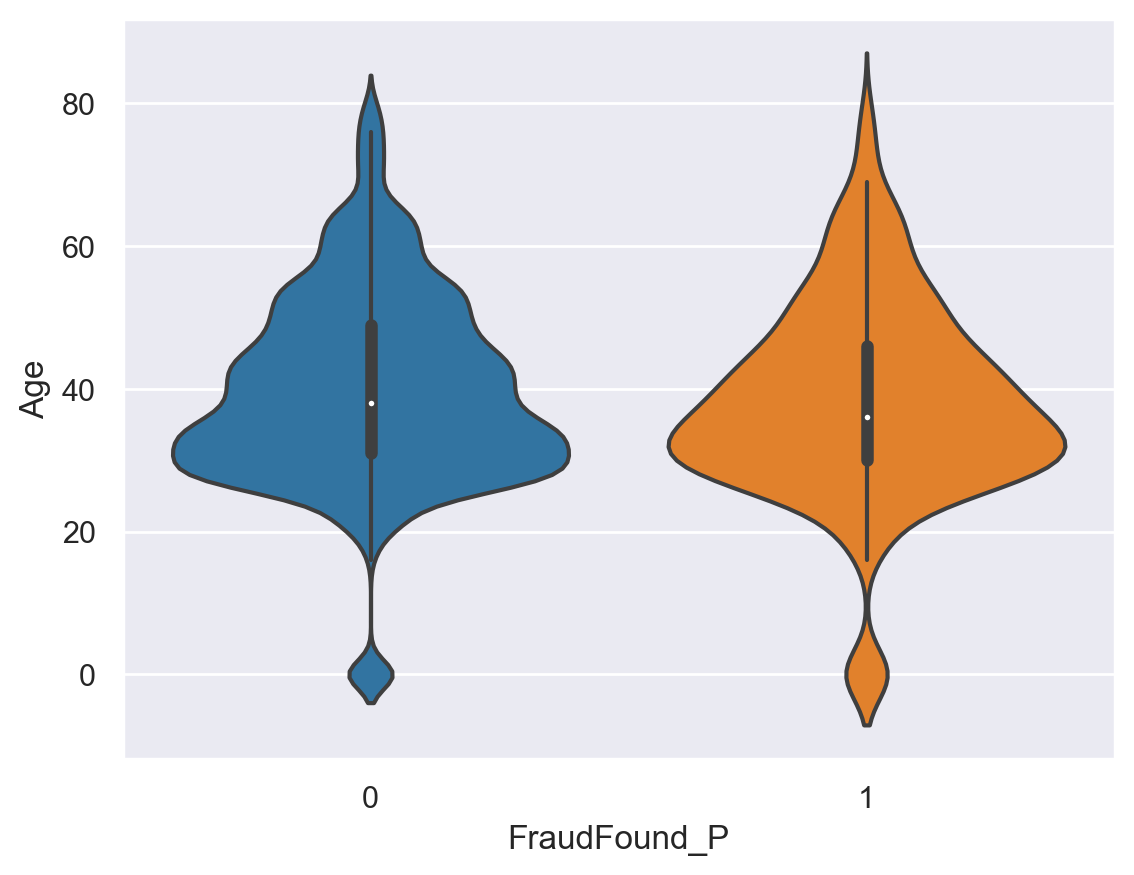

In [25]:
# seaborn Violin
# cut=0 revent the density from smoothing beyond the limits of the data:
# scale='count' Use a different scaling rule for normalizing the density:
#fig, axs = plt.subplots(2,1, sharex=True ) # layout='constrained'  , gridspec_kw={'width_ratios':[1,1]}
#ax1, ax2 = axs
#ax_org = sns.violinplot(data=df_claim, y='WeekOfMonth', x='FraudFound_P', ax=ax1) 
ax_tune = sns.violinplot(data=df_claim, y='Age', x='FraudFound_P') 

### The distribution is the same (Age = 0)
<p>The distribution of Age is the same whether FraudFound_P is True or not.  So, it is not necessary to drop the rows and lose the other data and since the age is not significant, we do not need to change the rows to the mean.  They can be left as is at zero. </p>

In [26]:
m = df_claim['Age'].min()
age0f = df_claim[ (df_claim['Age']== m) & (df_claim['FraudFound_P'] == 1)]
#print(issue.count())
age0f



,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
28,Jul,1,Saturday,Honda,Urban,Tuesday,Sep,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils
119,Dec,1,Friday,Honda,Rural,Friday,Dec,3,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils
309,Dec,5,Friday,Honda,Urban,Tuesday,Jan,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils
315,Dec,5,Friday,Honda,Urban,Monday,Jan,2,Male,Single,...,new,16 to 17,No,No,External,none,4 to 8 years,2 vehicles,1994,All Perils
317,Jan,1,Saturday,Honda,Urban,Wednesday,Jan,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
542,Jan,2,Tuesday,Honda,Urban,Friday,Jan,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils
844,Jan,4,Tuesday,Honda,Urban,Wednesday,Feb,2,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils
1071,Feb,1,Saturday,Honda,Rural,Thursday,Feb,2,Male,Single,...,new,16 to 17,No,No,External,none,2 to 3 years,2 vehicles,1994,Collision
1072,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils
1456,Feb,4,Monday,Honda,Urban,Tuesday,Feb,4,Male,Single,...,new,16 to 17,No,No,External,none,1 year,1 vehicle,1994,All Perils


#### Look at distribution of other int64
<p>Review the violinplot of the other possible significate variables. </p>

Text(0.5, 1.0, 'WeekOfMonth (1 == True)')

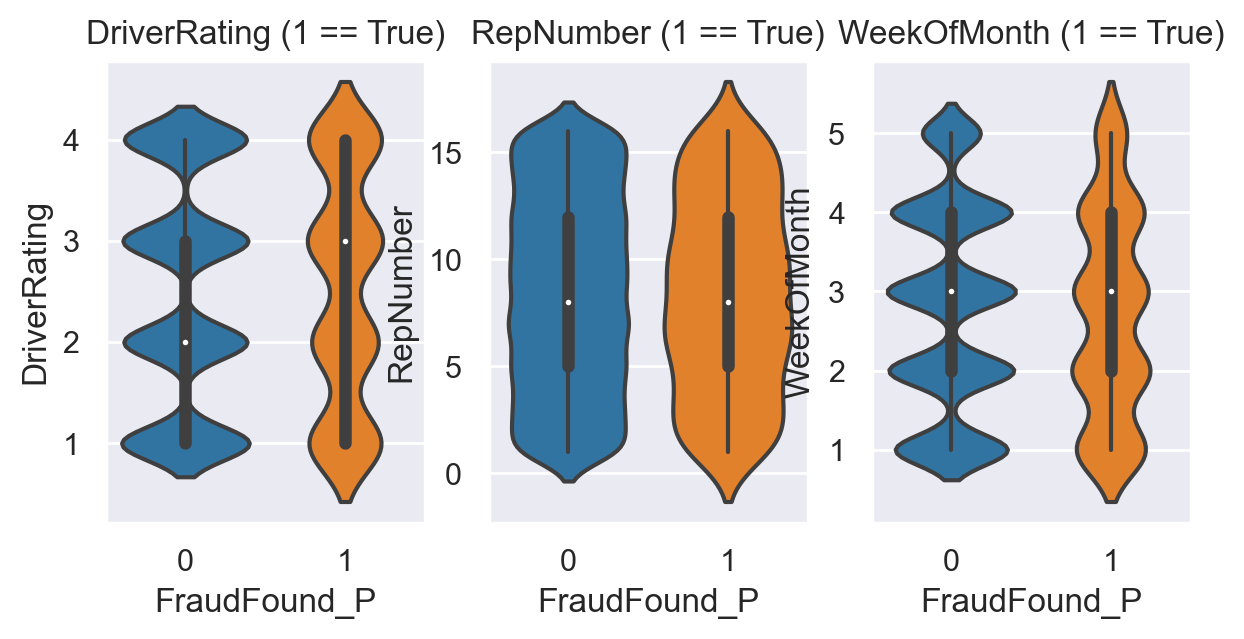

In [39]:
# seaborn Violin
# cut=0 revent the density from smoothing beyond the limits of the data:
# scale='count' Use a different scaling rule for normalizing the density:
#fig, axs = plt.subplots(2,1, sharex=True ) # layout='constrained'  , gridspec_kw={'width_ratios':[1,1]}
#ax1, ax2 = axs
#ax_org = sns.violinplot(data=df_claim, y='WeekOfMonth', x='FraudFound_P', ax=ax1) 

fig, ax = plt.subplots(1,3, figsize=(7,3))
axs = sns.violinplot(data=df_claim, y='DriverRating', x='FraudFound_P', 
                    ax=ax[0]) 
ax[0].set_title('DriverRating (1 == True)')
#plt.title('DriverRating Distribution (1 == True)')

axs = sns.violinplot(data=df_claim, y='RepNumber', x='FraudFound_P',
                   ax=ax[1])
ax[1].set_title('RepNumber (1 == True)')
#plt.title('RepNumber Distribution (1 == True)')

axs = sns.violinplot(data=df_claim, y='WeekOfMonth', x='FraudFound_P',
                    ax=ax[2]) 
ax[2].set_title('WeekOfMonth (1 == True)')

# Step 5a: <span style="color:green">EDA and Exploring your data with Pandas</span> 
##  Step 5a:<span style="color:green">EDA and Univariate - Plots</span>
#### Step 5a: <span style="color:green">Filter DatFrame Not_Fraud and Fraud </span> 

The rest of these questions will have you focus on using the following Pandas Skills:

You would have noted the datasets we have contain a Fraud (1 or 0) Variable that indicate whether the claim is Fraud FraudFound_P (1) or whether the claim is legitimate FraudFound_P (0).

<li> Use groupby on Univariate to limit the number of features to plot.</li> 
<li> Creating Bar Plots with Matplotlib</li> 

In [40]:
# Analyze Categorical Data plus FraudFound_P
nrow, ncol = df_claim.shape
df_cat = df_claim.select_dtypes(include = 'object').copy()
df_cat['FraudFound_P'] = df_claim.loc[df_cat.index, 'FraudFound_P'].copy()
#df_claim['Deductible'].dtypes

<p>For all features that looked like it had a category a bar greater than 10%. Verify and find the feature/category to apply first in decision tree. </p>


In [45]:
# create Univariate function
def Unigbtable(f1) :
    df = df_cat.groupby([f1], as_index=False)['FraudFound_P'].sum()
    cl_totals = df_claim.groupby([f1], as_index=False)['Age'].count()
    df['TotalClaims'] = cl_totals['Age']
    #print(ff_totals) 
    #print(cl_totals)
    df['%FraudByGroup'] = (df['FraudFound_P']/df['TotalClaims'])*100
    df['%ofTotalClaims'] = (df['FraudFound_P']/df_claim['Age'].count()*100)
    df['%ofAllFraud'] = (df['FraudFound_P']/df_claim['FraudFound_P'].sum()*100)
    # False positive = #Good/#Bad   or   (#Total-#Bad)/#Bad
    df['FalsePos'] = (df['TotalClaims'] - df['FraudFound_P']) / df['FraudFound_P']
    #print(df)
    
    # only interested in %FraudByGroup > 10 & False positive < 7
    #return df[(df['%FraudByGroup'] >= 6.0)]
    return df[(df['%FraudByGroup'] > 10.0) & (df['FalsePos'] < 9.0)]

In [46]:
# loop through all the category features 

# print the number of features
print(df_cat.columns)
nrow, ncol = df_cat.shape
nfeat = ncol - 1 # subtract 'FraudFound_P'
print("\nWe are examining ", nfeat, " features for significance.\nIf it appears below plot it.")

for c in list(df_cat.columns) :
    if c == 'FraudFound_P':
        pass
    else :
        uni = Unigbtable(c)
        if not uni.empty :
            display(uni)

Index(['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Deductible', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy', 'FraudFound_P'],
      dtype='object')

We are examining  25  features for significance.
If it appears below plot it.


,Make,FraudFound_P,TotalClaims,%FraudByGroup,%ofTotalClaims,%ofAllFraud,FalsePos
0,Accura,59,472,12.500000,0.382645,6.392199,7.000000
10,Mecedes,1,4,25.000000,0.006486,0.108342,3.000000
15,Saab,11,108,10.185185,0.071341,1.191766,8.818182
16,Saturn,6,58,10.344828,0.038913,0.650054,8.666667


,PolicyType,FraudFound_P,TotalClaims,%FraudByGroup,%ofTotalClaims,%ofAllFraud,FalsePos
0,Sedan - All Perils,411,4086,10.058737,2.665543,44.528711,8.941606
4,Sport - Collision,48,348,13.793103,0.311304,5.200433,6.250000
6,Utility - All Perils,41,340,12.058824,0.265906,4.442037,7.292683


,VehicleCategory,FraudFound_P,TotalClaims,%FraudByGroup,%ofTotalClaims,%ofAllFraud,FalsePos
2,Utility,44,391,11.253197,0.285362,4.767064,7.886364


,Deductible,FraudFound_P,TotalClaims,%FraudByGroup,%ofTotalClaims,%ofAllFraud,FalsePos
0,300,2,8,25.000000,0.012971,0.216685,3.000000
2,500,47,263,17.870722,0.304819,5.092091,4.595745


,Days_Policy_Accident,FraudFound_P,TotalClaims,%FraudByGroup,%ofTotalClaims,%ofAllFraud,FalsePos
4,none,9,55,16.363636,0.05837,0.975081,5.111111


,Days_Policy_Claim,FraudFound_P,TotalClaims,%FraudByGroup,%ofTotalClaims,%ofAllFraud,FalsePos
0,15 to 30,6,56,10.714286,0.038913,0.650054,8.333333
1,8 to 15,3,21,14.285714,0.019457,0.325027,6.000000


,AgeOfPolicyHolder,FraudFound_P,TotalClaims,%FraudByGroup,%ofTotalClaims,%ofAllFraud,FalsePos
1,18 to 20,2,15,13.333333,0.012971,0.216685,6.50
2,21 to 25,16,108,14.814815,0.103768,1.733478,5.75


,AddressChange_Claim,FraudFound_P,TotalClaims,%FraudByGroup,%ofTotalClaims,%ofAllFraud,FalsePos
1,2 to 3 years,51,291,17.525773,0.330761,5.525460,4.705882
4,under 6 months,3,4,75.000000,0.019457,0.325027,0.333333


,BasePolicy,FraudFound_P,TotalClaims,%FraudByGroup,%ofTotalClaims,%ofAllFraud,FalsePos
0,All Perils,452,4448,10.161871,2.931448,48.970748,8.840708


### Observations
<p><strong>Nine of the 24 features</strong> have a category that accures > 10% which is above the overall mean of 6%. </p>
<p>They are...</p>
<ol>
    <li>Make</li>
    <li>PolicyType</li>
    <li>VehicleCategory</li>
    <li>Days_Policy_Accident</li>
    <li>Days_Policy_Claim</li>
    <li>Deductible</li>
    <li>AgeOfPolicyHolder</li>
    <li>AddressChange_Claim</li>
    <li>BasePolicy</li>

</ol>

Plot the above nine features I want to start with the features that have a categories < 10 %. Also, plot Fault even though it %FraudByGroup is not > .10 its confince interaval very small and greater than .06.

<p>Do not use <b>BasePolicy</b> and <b>VehichleCategory</b> as the two together = <b>PolicyType</b></p>




## Plot Categorical Features
### Barplots against  against FraudFound_P (Binary) to find percent of fraud
<p>By using barplot with the binary column ‘FraudFound_P’ the height of the bar shows the percentage of fraud for that categorical feature.  If the 95% confidence interval is large it is most likely due to a small sample size.  When reviewing the categories not only should the mean be greater than the FraudFound_P population mean (6%) but the lower bound of the 95% confidence interval should be greater as well.</p>

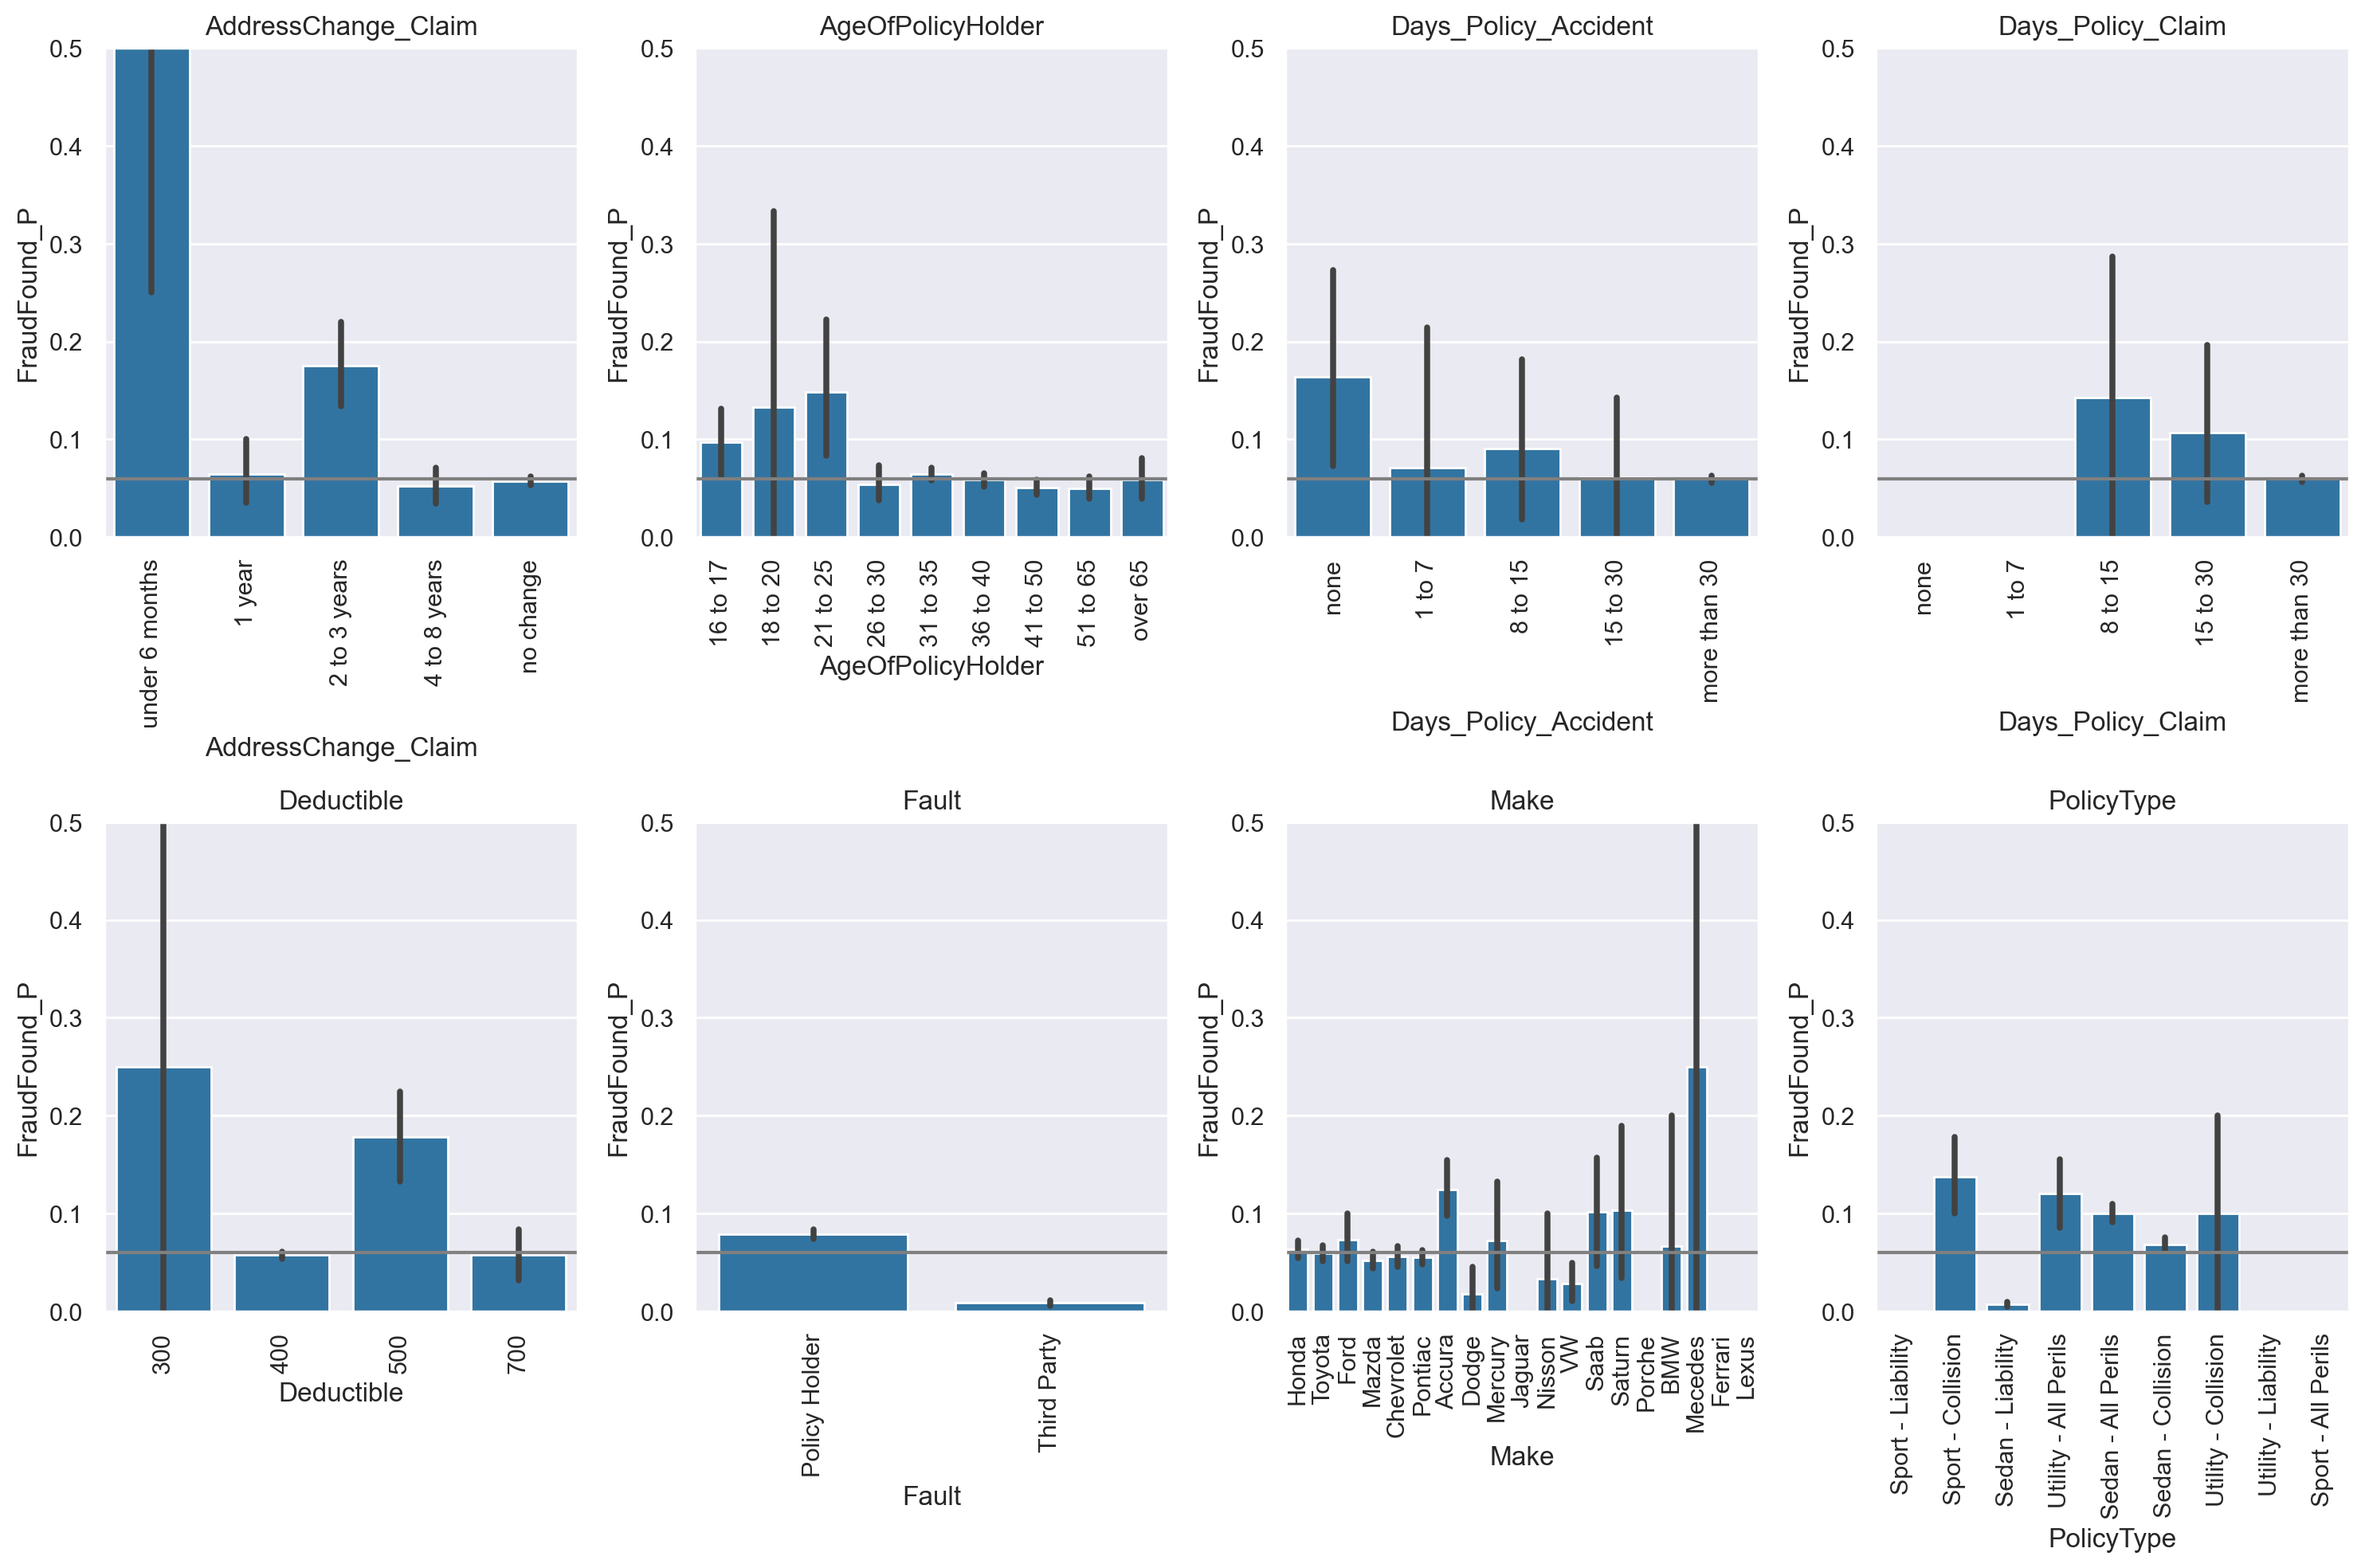

In [47]:
# Plots using seaborn
# Put categories in correct order
month_order = ['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
weekday_order = ['Sunday','Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday']
vprice_order = ['less than 20000', '20000 to 29000', '30000 to 39000', '40000 to 59000', '60000 to 69000', 
                'more than 69000']
AgeOfPH_order = ['16 to 17', '18 to 20', '21 to 25', '26 to 30', '31 to 35', '36 to 40', 
                 '41 to 50', '51 to 65', 'over 65'] 
AgeOfVeh_order = [ 'new', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', 'more than 7'] 
Days_Policy_A_order = ['none','1 to 7', '8 to 15', '15 to 30',  'more than 30'] 
AddChange_Claim_order = ['under 6 months', '1 year', '2 to 3 years', '4 to 8 years', 'no change'] 




def plotme(feature, a1, a2, o=None) :   
        axs = sns.barplot(x=feature, 
                     y='FraudFound_P', 
                    data=df_claim, 
                    color='tab:blue',
                    order=o,      
                    ax=ax[a1][a2])
        ax[a1][a2].set_title(feature)
        ax[a1][a2].set_ylim([0,.5])
        ax[a1][a2].set_xticklabels(ax[a1][a2].get_xticklabels(), rotation=90)     
        axs.axhline(y=.06, color='grey')    
#        patch_h = [patch.get_height() for patch in axs.patches]
#        idx_tallest = np.argmax(patch_h)
#        idx_gr6 = [i for i, v in enumerate(patch_h) if v>.06]
#        idx_gr10 = [i for i, v in enumerate(patch_h) if v>.08]
#        for i in idx_gr6 :
#            axs.patches[i].set_facecolor('tab:blue')  # tab:orange, maroon, firebrick, lightcoral, indianred
            
#        for i in idx_gr10 :
#            axs.patches[i].set_facecolor('tab:blue')
        
           



#plt.figure(figsize=(3,2))
#fig, ax = plt.subplots(4,3, figsize=(15,25)) 
fig, ax = plt.subplots(2,4, figsize=(15,10)) 
#plotme('AccidentArea', 0,0)
plotme('AddressChange_Claim', 0,0, AddChange_Claim_order)
#plotme('AgeOfVehicle', 0,2, AgeOfVeh_order)

plotme('AgeOfPolicyHolder', 0,1, AgeOfPH_order)
#plotme('AgentType', 1,1)
#plotme('BasePolicy', 0,2)

plotme('Days_Policy_Accident', 0,2, Days_Policy_A_order)
plotme('Days_Policy_Claim', 0,3, Days_Policy_A_order)
plotme('Deductible', 1,0)

plotme('Fault', 1,1)   # significant with Chi-squared
plotme('Make', 1,2)
#plotme('MaritalStatus', 3,2)

#plotme('Month', 4,0, month_order)
#plotme('MonthClaimed', 4,1, month_order)
#plotme('NumberOfCars', 4,2)

#plotme('PastNumberOfClaims', 5,0)
plotme('PolicyType', 1,3)
#plotme('Sex', 5,2)

#plotme('VehicleCategory', 3,0)
#plotme('VehiclePrice', 6,1, vprice_order)




#plt.xticks(rotation=45)

fig.tight_layout()

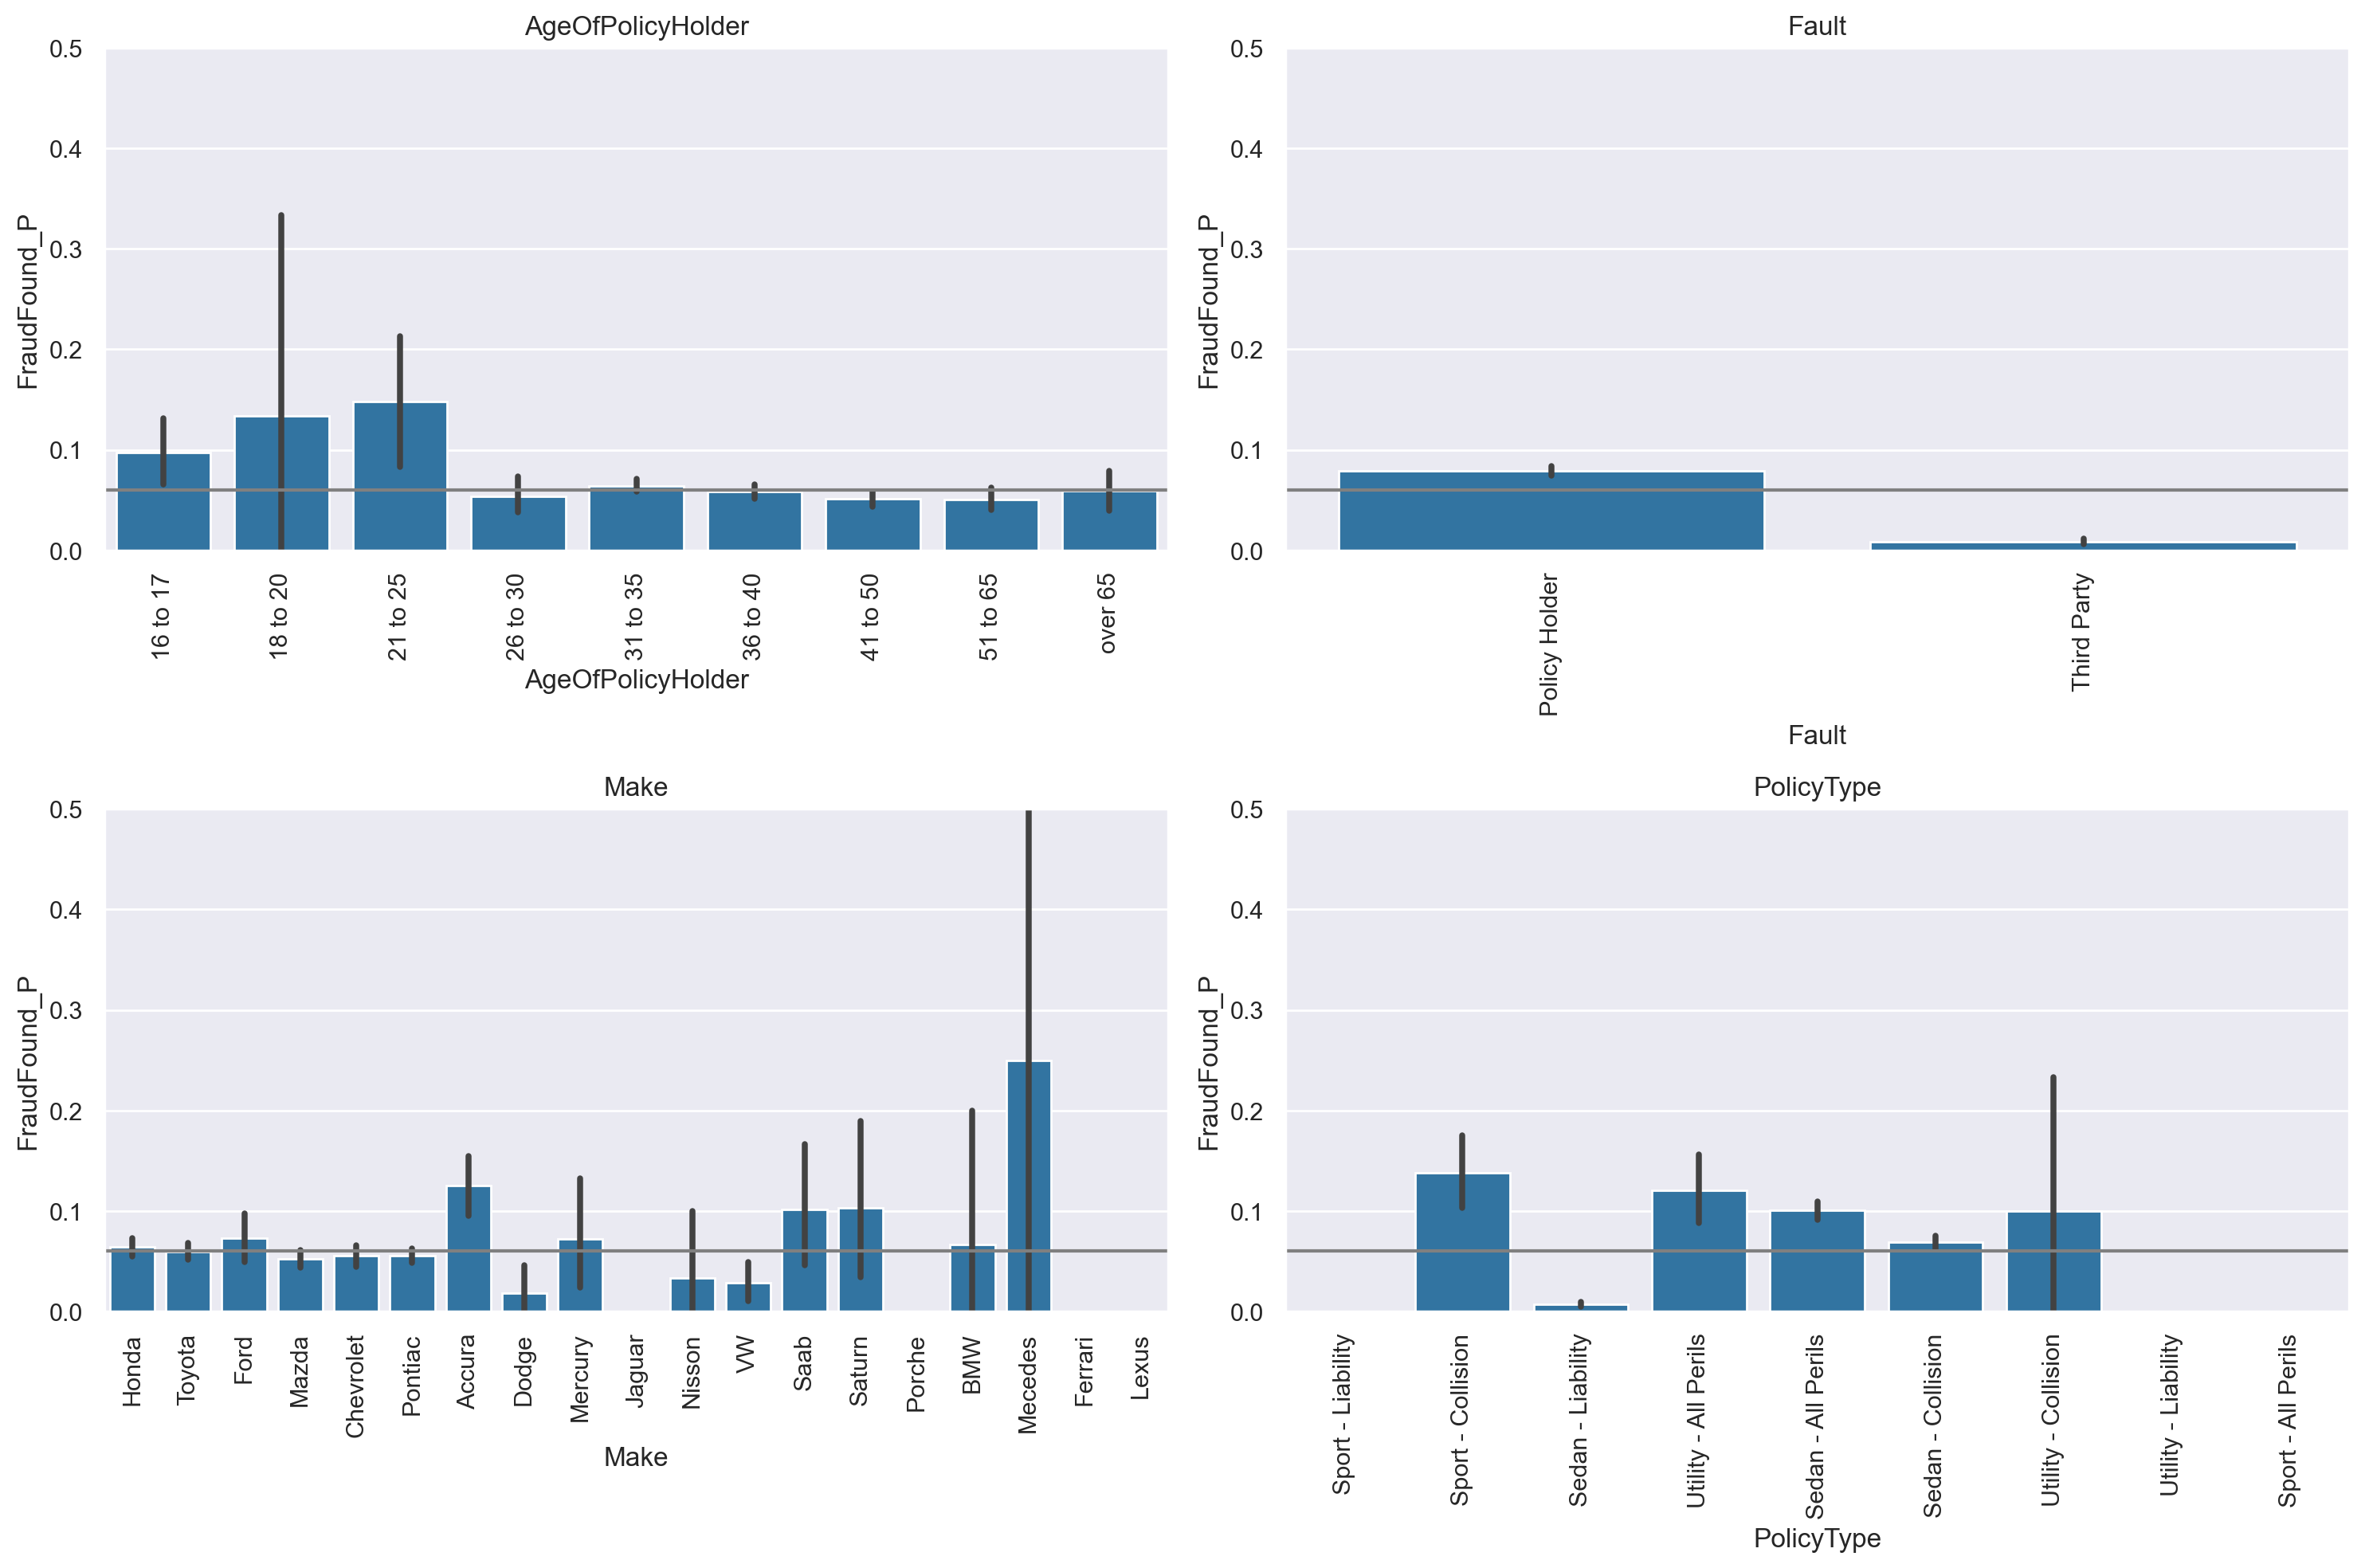

In [53]:
# Plots using seaborn
# Put categories in correct order
month_order = ['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
weekday_order = ['Sunday','Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday']
vprice_order = ['less than 20000', '20000 to 29000', '30000 to 39000', '40000 to 59000', '60000 to 69000', 
                'more than 69000']
AgeOfPH_order = ['16 to 17', '18 to 20', '21 to 25', '26 to 30', '31 to 35', '36 to 40', 
                 '41 to 50', '51 to 65', 'over 65'] 
AgeOfVeh_order = [ 'new', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', 'more than 7'] 
Days_Policy_A_order = ['none','1 to 7', '8 to 15', '15 to 30',  'more than 30'] 
AddChange_Claim_order = ['under 6 months', '1 year', '2 to 3 years', '4 to 8 years', 'no change'] 




def plotme(feature, a1, a2, o=None) :   
        axs = sns.barplot(x=feature, 
                     y='FraudFound_P', 
                    data=df_claim, 
                    color='tab:blue',
                    order=o,      
                    ax=ax[a1][a2])
        ax[a1][a2].set_title(feature)
        ax[a1][a2].set_ylim([0,.5])
        ax[a1][a2].set_xticklabels(ax[a1][a2].get_xticklabels(), rotation=90)     
        axs.axhline(y=.06, color='grey')    
#        patch_h = [patch.get_height() for patch in axs.patches]
#        idx_tallest = np.argmax(patch_h)
#        idx_gr6 = [i for i, v in enumerate(patch_h) if v>.06]
#        idx_gr10 = [i for i, v in enumerate(patch_h) if v>.08]
#        for i in idx_gr6 :
#            axs.patches[i].set_facecolor('tab:blue')  # tab:orange, maroon, firebrick, lightcoral, indianred
            
#        for i in idx_gr10 :
#            axs.patches[i].set_facecolor('tab:blue')
        
           



#plt.figure(figsize=(3,2))
#fig, ax = plt.subplots(4,3, figsize=(15,25)) 
fig, ax = plt.subplots(2,2, figsize=(15,10)) 
#plotme('AccidentArea', 0,0)
#plotme('AddressChange_Claim', 0,0, AddChange_Claim_order)
#plotme('AgeOfVehicle', 0,2, AgeOfVeh_order)

plotme('AgeOfPolicyHolder', 0,0, AgeOfPH_order)
#plotme('AgentType', 1,1)
#plotme('BasePolicy', 0,2)

#plotme('Days_Policy_Accident', 0,2, Days_Policy_A_order)
#plotme('Days_Policy_Claim', 0,3, Days_Policy_A_order)
#plotme('Deductible', 1,0)

plotme('Fault', 0,1)   # significant with Chi-squared
plotme('Make', 1,0)
#plotme('MaritalStatus', 3,2)

#plotme('Month', 4,0, month_order)
#plotme('MonthClaimed', 4,1, month_order)
#plotme('NumberOfCars', 4,2)

#plotme('PastNumberOfClaims', 5,0)
plotme('PolicyType', 1,1)
#plotme('Sex', 5,2)

#plotme('VehicleCategory', 3,0)
#plotme('VehiclePrice', 6,1, vprice_order)




#plt.xticks(rotation=45)

fig.tight_layout()

# Step 5b: <span style="color:green">EDA and Exploring your data with Pandas</span> 
##  Step 5b:<span style="color:green">EDA and Bivariate - Plots</span>
#### Step 5b: <span style="color:green">Filter DatFrame Not_Fraud and Fraud </span> 

<p>Look at the top two features - Bivariate</p>
<p>1) plot - PolicyType and Fault</p>
<p>2) plot - PolicyType and AddressChange_Claim</p>

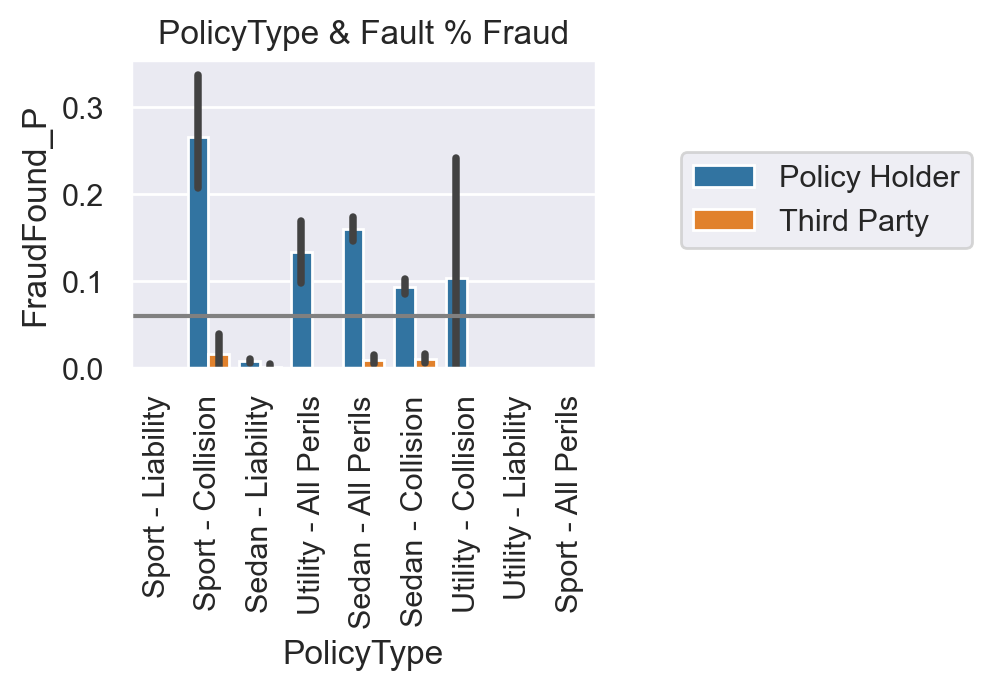

In [75]:
plt.figure(figsize=(3,2))
ax = sns.barplot(x='PolicyType', y='FraudFound_P', 
                 hue='Fault', data=df_claim) # , color='tab:blue'
ax.axhline(y=.06, color='grey')    
ax.set_title('PolicyType & Fault % Fraud')
plt.xticks(rotation=90)
ax.legend(bbox_to_anchor=(1.15,0.75))  # for ax axis
plt.show()

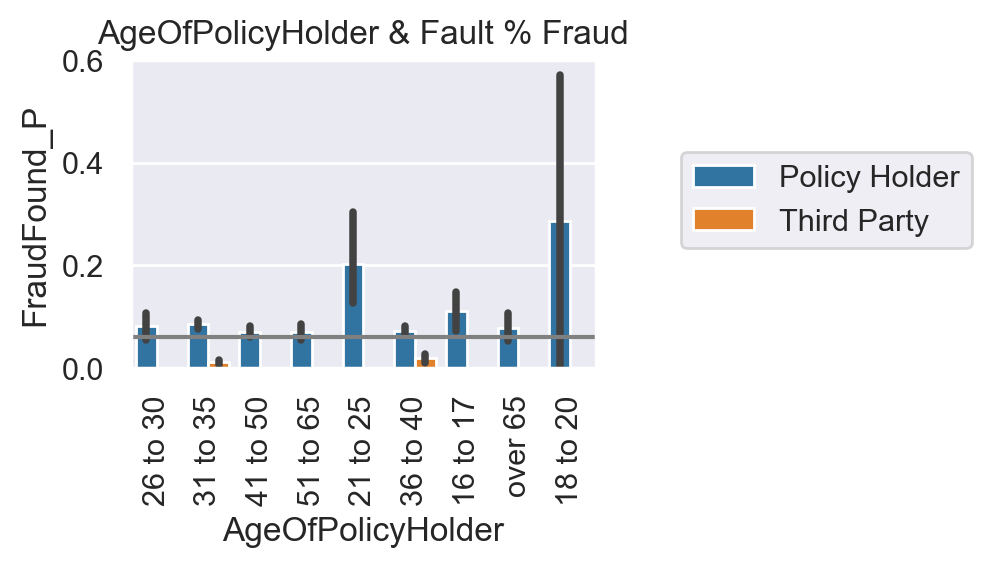

In [76]:
plt.figure(figsize=(3,2))
ax = sns.barplot(x='AgeOfPolicyHolder', y='FraudFound_P', 
                 hue='Fault', data=df_claim) # , color='tab:blue'
ax.axhline(y=.06, color='grey')    
ax.set_title('AgeOfPolicyHolder & Fault % Fraud')
plt.xticks(rotation=90)
ax.legend(bbox_to_anchor=(1.15,0.75))  # for ax axis
plt.show()

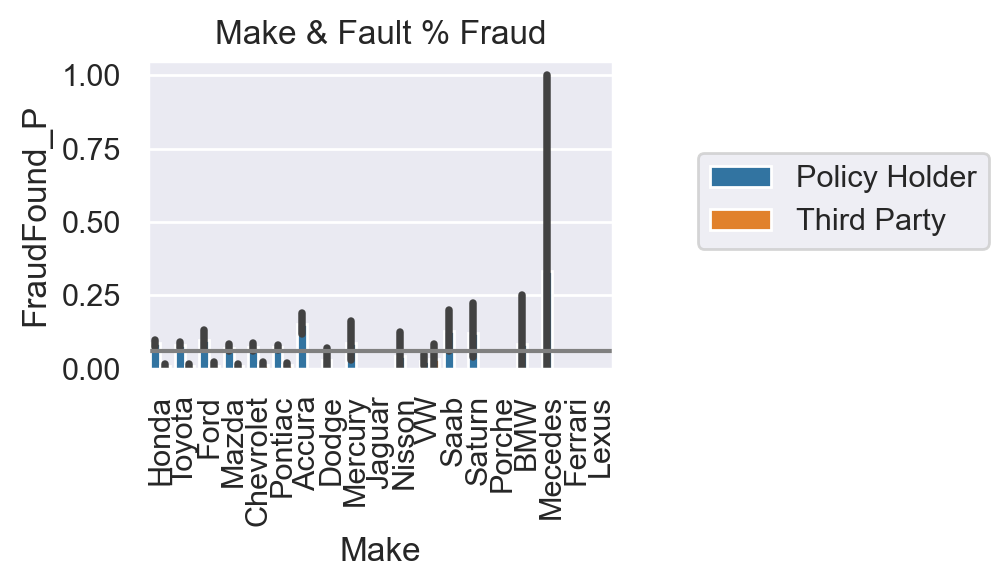

In [77]:
plt.figure(figsize=(3,2))
ax = sns.barplot(x='Make', y='FraudFound_P', 
                 hue='Fault', data=df_claim) # , color='tab:blue'
ax.axhline(y=.06, color='grey')    
ax.set_title('Make & Fault % Fraud')
plt.xticks(rotation=90)
ax.legend(bbox_to_anchor=(1.15,0.75))  # for ax axis
plt.show()

#### Create dataset with just Categorical columns or features.
#### Create a function to facilitate the Bivariate computations.

In [54]:


# create Bivariate function
def bigbtable(f1, f2) :
    df = df_cat.groupby([f1, f2], as_index=False)['FraudFound_P'].sum()
    cl_totals = df_claim.groupby([f1, f2], as_index=False)['Age'].count()
    df['TotalClaimsGP'] = cl_totals['Age']
    #print(ff_totals) 
    #print(cl_totals)
    df['%FraudByGroup'] = (df['FraudFound_P']/df['TotalClaimsGP'])*100
    df['%ofTotalClaims'] = (df['FraudFound_P']/df_claim['Age'].count()*100)
    df['%ofAllFraud'] = (df['FraudFound_P']/df_claim['FraudFound_P'].sum()*100)
    # False positive = #Good/#Bad   or   (#Total-#Bad)/#Bad
    df['FalsePos'] = (df['TotalClaimsGP'] - df['FraudFound_P']) / df['FraudFound_P']
    #print(df)
    
    # only interested in %FraudByGroup > 10 & False positive < 7
    #return df[(df['%FraudByGroup'] >= 10.0)]
    #return df[(df['%FraudByGroup'] >= 10.0) & (df['TotalClaimsGP'] > 50) & (df['FalsePos'] < 7.0)]
    return df[(df['%FraudByGroup'] > 10.0) & (df['FalsePos'] < 5.0)]



In [55]:
table = bigbtable('PolicyType', 'Fault') # AddressChange_Claim

table

,PolicyType,Fault,FraudFound_P,TotalClaimsGP,%FraudByGroup,%ofTotalClaims,%ofAllFraud,FalsePos
8,Sport - Collision,Policy Holder,45,169,26.627219,0.291848,4.875406,2.755556


In [56]:
table = bigbtable('PolicyType', 'AddressChange_Claim') # AddressChange_Claim

table

,PolicyType,AddressChange_Claim,FraudFound_P,TotalClaimsGP,%FraudByGroup,%ofTotalClaims,%ofAllFraud,FalsePos
1,Sedan - All Perils,2 to 3 years,22,70,31.428571,0.142681,2.383532,2.181818
4,Sedan - All Perils,under 6 months,3,3,100.000000,0.019457,0.325027,0.000000
6,Sedan - Collision,2 to 3 years,24,101,23.762376,0.155652,2.600217,3.208333
16,Sport - Collision,2 to 3 years,4,6,66.666667,0.025942,0.433369,0.500000
20,Utility - All Perils,1 year,1,5,20.000000,0.006486,0.108342,4.000000
22,Utility - All Perils,4 to 8 years,4,19,21.052632,0.025942,0.433369,3.750000


In [57]:
table = bigbtable('Fault', 'AddressChange_Claim') # AddressChange_Claim

table

,Fault,AddressChange_Claim,FraudFound_P,TotalClaimsGP,%FraudByGroup,%ofTotalClaims,%ofAllFraud,FalsePos
4,Policy Holder,under 6 months,3,4,75.000000,0.019457,0.325027,0.333333
6,Third Party,2 to 3 years,36,77,46.753247,0.233478,3.900325,1.138889


# How to Calculate Cramer’s V in Python
Cramer’s V is a measure of the strength of association between two nominal variables.

It ranges from 0 to 1 where:

0 indicates no association between the two variables.
1 indicates a strong association between the two variables.
It is calculated as:

Cramer’s V = √(X2/n) / min(c-1, r-1)

where:

X2: The Chi-square statistic
n: Total sample size
r: Number of rows
c: Number of columns
Calculate Cramer’s V for a contingency table in Python.


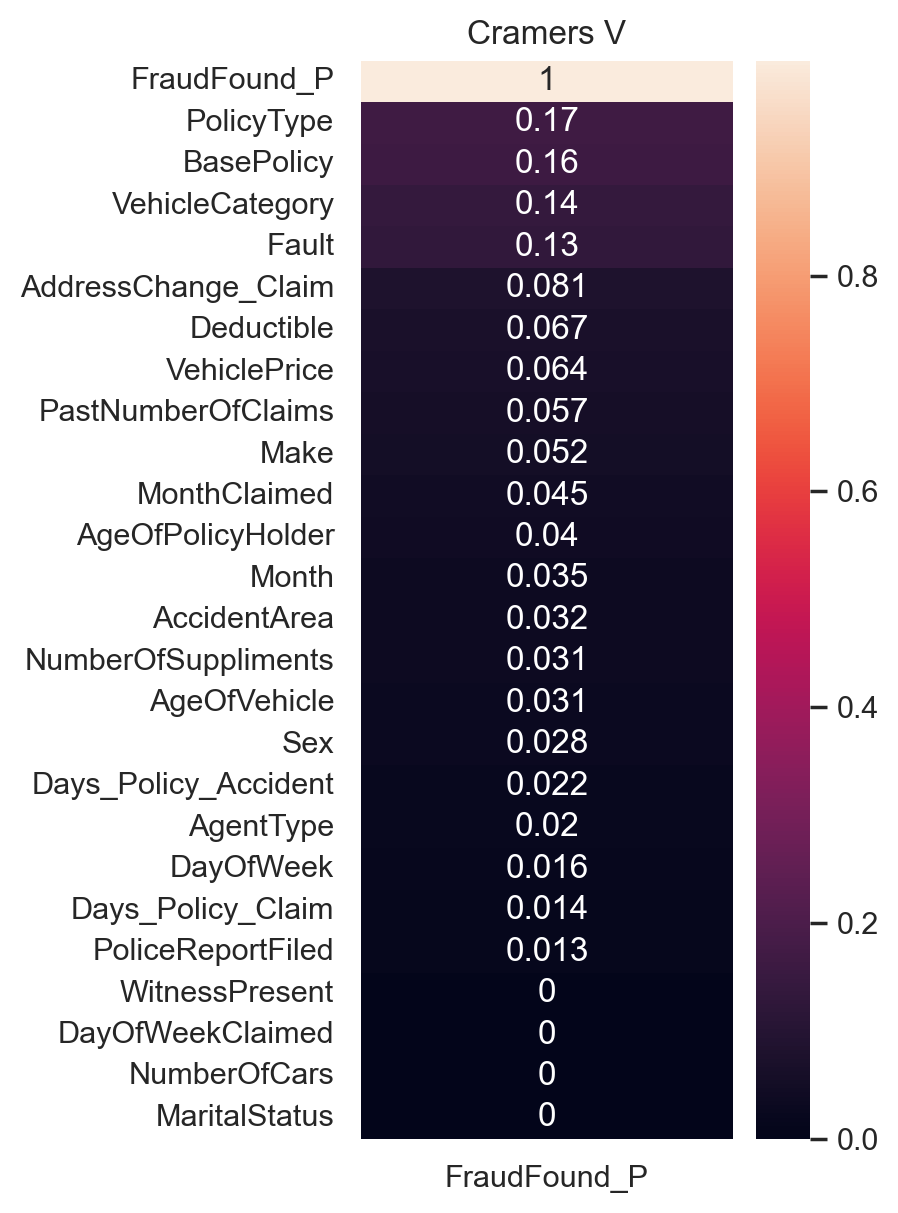

In [58]:
# Create df with Nominal variables & 'FraudFound_P'
df_str = pd.DataFrame()

for i in list(df_claim) :

    if (is_string_dtype(df_claim[i])) :
        df_str[i] = df_claim[i]

df_str['FraudFound_P'] = df_claim['FraudFound_P']
#print(df_str['FraudFound_P'].head())

# abc type list
abc = []
for i in df_claim.columns :
    if i == 'FraudFound_P' :
        abc.append(i)
    if df_claim[i].dtype=='object' :
        abc.append(i)

#display(abc)
    

def cramers_v(x, y):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.to_numpy().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cramers_df = pd.DataFrame(index=abc) # set index to have row names

for x in abc:
    a = []
    for y in abc :
        a.append(cramers_v(df_claim[y], df_claim[x]))  # Error Cramers_v() takes 1 argument
    cramers_df[x] = a

# sns.heatmap(corr_df, annot=True) - annot - Use annot to represent the cell values with text:

plt.figure(figsize=(3,7))
#sns.heatmap(cramers_df, annot=True, linewidth=.5, fmt='.2f')
cramer_FF_sort = pd.DataFrame(index=abc) # set index to have row names
cramer_FF_sort['FraudFound_P'] = cramers_df['FraudFound_P']
cramer_FF_sort.sort_values(by='FraudFound_P',ascending=False, inplace=True)
sns.heatmap(cramer_FF_sort, annot=True)
plt.title('Cramers V')
plt.show()
#display(cramer_FF_sort.sort_values(by=['FraudFound_P'], ascending=False))

### Is there evidence that 'Feature' predicts Fraud?

We can interpret the test statistic in the context of the chi-squared distribution with the requisite number of degress of freedom as follows:

If **Statistic >= Critical Value: significant result**, reject null hypothesis (H0), dependent.
If Statistic < Critical Value: not significant result, fail to reject null hypothesis (H0), independent.

In terms of a p-value and a chosen significance level (alpha), the test can be interpreted as follows:

If **p-value <= alpha: significant result**, reject null hypothesis (H0), dependent.
If p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent.

In [78]:
df_claim_chi_result=[]
for feat in df_claim.columns:
    chi2_val, p_val, dof2, ex1 = stats.chi2_contingency(pd.crosstab(df_claim[feat], df_claim['FraudFound_P']))
    df_claim_chi_result.append([feat,chi2_val,dof2, p_val])
#    print('\nFeature is ', feat)
#    print('dof=%d' % dof2)
    #print(ex1)
    # interpret test-statistic
    prob = 0.95
    critical = stats.chi2.ppf(prob, dof2)
#    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, chi2_val))
#    if abs(chi2_val) >= critical :
#        print('   ---Dependent (reject H0) chi2 >= critical')
#    else :
#        print('   Independent (fail to reject H0)')
#
#        
#    # interpret p-value
#    alpha = 1.0 - prob
#    print('significance=%.3f, p=%.3f' % (alpha, p_val))
#    if p_val <= alpha:
#        print('   ---Dependent (reject H0) p_val <= alpha')
#    else:
#        print('   Independent (fail to reject H0)')

    
chi_df = pd.DataFrame(df_claim_chi_result, columns=['Features', 'Chi2 val','dof', 'p-val'])
chi_df.sort_values(by='p-val',ascending=True, inplace=True)    
#Printing on the variables that had a p-val less than 0.05
#print(tabulate(chi_df[chi_df['p-val']<0.05], headers=['\nFeature', '\nChi2 val', '\np-val']))

chi_df[chi_df['p-val']<0.05]


,Features,Chi2 val,dof,p-val
15,FraudFound_P,15401.236138,1,0.000000e+00
12,PolicyType,437.491381,8,1.768441e-89
31,BasePolicy,402.947238,2,3.170436e-88
13,VehicleCategory,290.980893,2,6.520817e-64
11,Fault,264.984556,1,1.406180e-59
28,AddressChange_Claim,104.722693,4,9.704718e-22
17,Deductible,72.406255,3,1.302831e-15
14,VehiclePrice,67.836116,5,2.888324e-13
21,PastNumberOfClaims,53.541755,3,1.405198e-11
3,Make,59.815292,18,2.191573e-06


### Both Chi charts show that the most significat features are...  

- PolicyType	&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.166880
- BasePolicy	&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.161237
- VehicleCategory	&nbsp;&nbsp;&nbsp;&nbsp;0.136892
- Fault	&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.130839
- AddressChange_Claim	&nbsp;&nbsp;&nbsp;&nbsp;0.080827
- Deductible	&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.067096
- VehiclePrice	&nbsp;&nbsp;&nbsp;&nbsp;0.063803

Again, BasePolicy and VehicleCategory are already in PolicyType so, removing those leaves of with..

- PolicyType	&nbsp;&nbsp;&nbsp;&nbsp;0.166880
- Fault			&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.130839
- AddressChange_Claim	&nbsp;&nbsp;&nbsp;&nbsp;0.080827
- Deductible	&nbsp;&nbsp;&nbsp;&nbsp;0.067096
- VehiclePrice	&nbsp;&nbsp;&nbsp;&nbsp;0.063803

# Pandas Pivot Tables

<p>Use the following code to force the display of an entire dataframe.</p>

In [79]:
from IPython.core.display import display, HTML

def force_show_all(df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', None):
        display(HTML(df.to_html()))

# ... now when you're ready to fully display df:
# force_show_all(df)

# Use PivotTable to show the % fraud based on features
<p>Start with the top features produced by Chi table</p>
<p>Calculate with 3 and 4 features</p>


In [62]:
# define function to compute FraudFound table and Savings

def pivFraud(df, feat) :
    df2 = df.copy()
    piv = df2.pivot_table(index = feat, values='FraudFound_P', 
                        aggfunc=['sum', 'count','mean']) 
    piv['falsepos'] = (piv['count']-piv['sum'])/piv['sum']  # Good/Bad
    piv['Found75%'] = round((piv['sum']*.75), 0)            # Agent only finds 75% of fraud
    
    # filter Assumptions  
    piv105 = piv[(piv.iloc[:, 1] > 7) & (piv.iloc[:, 2] > .1)  & (piv.iloc[:, 3] <= 7.0)]
    
    #piv105 = piv[(piv.iloc[:, 1] > 5) & (piv.iloc[:, 2] > .1)  & (piv.iloc[:, 3] <= 5.0)]
    
    
    tff = piv105.iloc[:, 0].sum()  # sum - Fraud     
    tc = piv105.iloc[:, 1].sum()  # count - claims
    TotalpopFraud = df2['FraudFound_P'].sum() # Total Populations Fraud (923)
    TotalpopClaims = df2['FraudFound_P'].count() # Total Populations claims (15,420)
    pcttff = (tff/TotalpopFraud)*100
    f75 = (piv105.iloc[:,4].sum())  # fraud fround by agents
    pctf75 = f75/(TotalpopFraud)*100  # % of all fraud found at 75%
    pcttc = (tc/df2['FraudFound_P'].count())*100
    print(tff, "- fraud claims found.  percent - ", pcttff)
    print(tc, " -  # of claims in Groups. ","percent of all claims - ",round(pcttc,1), "%")
    print(round((tc-tff)/tff,1), "- False Positve for the group.")
    print(round(((tc-f75)/f75),1), "- fp of Agent Foud (75%)")
    print( round(pcttff,2), "% of the population fraud is contained by filter on these ", len(ufeat), " features.")
    print( round(pctf75, 2) , "% - Percent of all fraud caught by agents at (75%) detection rate.")
    #print(piv105.shape)
    print()

    
    # Savings
    #TotalpopFraud = df_cat['FraudFound_P'].sum()
    NewFraudFound75 = round((TotalpopFraud-f75)*100/TotalpopClaims,1)
    NewFraudFound = round((TotalpopFraud-tff)*100/TotalpopClaims,1)
    print("\nSavings")
    print("Assuming Agents only catch 75% of actual fraud claims...")
    print("If agents randomly flaged the same (",round(pcttc,1), "%) of claims at random they would find on average .75*.06 fraud.")
    print("That is (", round(tc*.06*.75,), ") claims if choosen at random.")

    print("The agents should find (" , round(f75,), ") fraudulent claims or, (", round(f75/(tc*.06*.75)*100,1),"%) increase." )
    print(NewFraudFound, "% Fraud with rule")
    print(NewFraudFound75, "% Fraud with rule & 75%")
    print(round((6.0-NewFraudFound75),1), "% **If we implement these rules we will reduce overall fraud by this!")
    force_show_all(piv105)

In [63]:
# Use the top three features from Chi table
ufeat = [  'PolicyType','Fault','AddressChange_Claim' ] 
pivFraud(df_cat, ufeat)

497 - fraud claims found.  percent -  53.84615384615385
2882  -  # of claims in Groups.  percent of all claims -  18.7 %
4.8 - False Positve for the group.
6.7 - fp of Agent Foud (75%)
53.85 % of the population fraud is contained by filter on these  3  features.
40.3 % - Percent of all fraud caught by agents at (75%) detection rate.


Savings
Assuming Agents only catch 75% of actual fraud claims...
If agents randomly flaged the same ( 18.7 %) of claims at random they would find on average .75*.06 fraud.
That is ( 130 ) claims if choosen at random.
The agents should find ( 372 ) fraudulent claims or, ( 286.8 %) increase.
2.8 % Fraud with rule
3.6 % Fraud with rule & 75%
2.4 % **If we implement these rules we will reduce overall fraud by this!


In [64]:
# Add the x feature - Make
ufeat = [  'Fault','PolicyType', 'Make' ,'AgeOfPolicyHolder'
          ] # 20.2 % claims - 40.7 % (after75%) (5.2fp)
pivFraud(df_cat, ufeat)



457 - fraud claims found.  percent -  49.512459371614305
2368  -  # of claims in Groups.  percent of all claims -  15.4 %
4.2 - False Positve for the group.
5.9 - fp of Agent Foud (75%)
49.51 % of the population fraud is contained by filter on these  4  features.
36.94 % - Percent of all fraud caught by agents at (75%) detection rate.


Savings
Assuming Agents only catch 75% of actual fraud claims...
If agents randomly flaged the same ( 15.4 %) of claims at random they would find on average .75*.06 fraud.
That is ( 107 ) claims if choosen at random.
The agents should find ( 341 ) fraudulent claims or, ( 320.0 %) increase.
3.0 % Fraud with rule
3.8 % Fraud with rule & 75%
2.2 % **If we implement these rules we will reduce overall fraud by this!


In [65]:
#  This is an example of overfit - extrem over fit
ufeat = [ 'DayOfWeek','DayOfWeekClaimed', 'Fault', 'AgeOfPolicyHolder' ] # 'Month', 'Make', 

pivFraud(df_cat, ufeat)

216 - fraud claims found.  percent -  23.401950162513543
1378  -  # of claims in Groups.  percent of all claims -  8.9 %
5.4 - False Positve for the group.
7.3 - fp of Agent Foud (75%)
23.4 % of the population fraud is contained by filter on these  4  features.
17.98 % - Percent of all fraud caught by agents at (75%) detection rate.


Savings
Assuming Agents only catch 75% of actual fraud claims...
If agents randomly flaged the same ( 8.9 %) of claims at random they would find on average .75*.06 fraud.
That is ( 62 ) claims if choosen at random.
The agents should find ( 166 ) fraudulent claims or, ( 267.7 %) increase.
4.6 % Fraud with rule
4.9 % Fraud with rule & 75%
1.1 % **If we implement these rules we will reduce overall fraud by this!


In [66]:
#  This is an example of overfit - extrem over fit
ufeat = [ 'BasePolicy', 'Fault', 'AgeOfPolicyHolder', 'Deductible' ] # 'Month', 'Make', 

pivFraud(df_cat, ufeat)

408 - fraud claims found.  percent -  44.20368364030336
2272  -  # of claims in Groups.  percent of all claims -  14.7 %
4.6 - False Positve for the group.
6.4 - fp of Agent Foud (75%)
44.2 % of the population fraud is contained by filter on these  4  features.
33.15 % - Percent of all fraud caught by agents at (75%) detection rate.


Savings
Assuming Agents only catch 75% of actual fraud claims...
If agents randomly flaged the same ( 14.7 %) of claims at random they would find on average .75*.06 fraud.
That is ( 102 ) claims if choosen at random.
The agents should find ( 306 ) fraudulent claims or, ( 299.3 %) increase.
3.3 % Fraud with rule
4.0 % Fraud with rule & 75%
2.0 % **If we implement these rules we will reduce overall fraud by this!


# sklearn.model_selection.train_test_split
`sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)[source]`

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

### How to model the Categorical Data?  
<p>DecisionTreeClassifier() works with numeic not categorical. </p>
<p>Need to one-hot encode categorical variables before you fit a tree with sklearn</p>

`import pandas as pd
from sklearn.tree import DecisionTreeClassifier

data = pd.DataFrame()
data['A'] = ['a','a','b','a']
data['B'] = ['b','b','a','b']
data['C'] = [0, 0, 1, 0]
data['Class'] = ['n','n','y','n']

tree = DecisionTreeClassifier()

one_hot_data = pd.get_dummies(data[['A','B','C']],drop_first=True)
tree.fit(one_hot_data, data['Class'])`

https://stackoverflow.com/questions/38108832/passing-categorical-data-to-sklearn-decision-tree

# .get_dummies (one_hot_data) and Split the data into train & test

In [80]:
# Split data 75% train 25% test 
# define X,y
df_nMake = df_cat.copy()
#df_nMake = df_nMake.drop('Make', axis=1, inplace=True)  # axis = 1 for column; don'tcrate copy of index
X = df_nMake.drop(columns=['FraudFound_P'], axis=1)
y = df_nMake['FraudFound_P']

one_hot_data = pd.get_dummies(X, drop_first=True) # drop_first gives n-1 columns

#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=0)
X_train, X_test, y_train, y_test = train_test_split( one_hot_data, y, test_size=0.25, random_state=0)

In [81]:
one_hot_data.head(3)


,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,...,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_Collision,BasePolicy_Liability
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


Model and evaluate
 - Create the model and fit teh model 
 - proceed to classify data
 - evaluate performance

In [82]:
X_train.describe()

,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,...,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_Collision,BasePolicy_Liability
count,11564.000000,11564.000000,11564.000000,11564.000000,11564.000000,11564.00000,11564.000000,11564.000000,11564.000000,11564.000000,...,11564.000000,11564.000000,11564.000000,11564.000000,11564.000000,11564.000000,11564.000000,11564.000000,11564.000000,11564.000000
mean,0.074888,0.083708,0.084832,0.091923,0.082584,0.08414,0.088464,0.089934,0.076271,0.082757,...,0.018765,0.041941,0.928139,0.000173,0.047561,0.024213,0.001038,0.000173,0.386199,0.326012
std,0.263221,0.276961,0.278644,0.288930,0.275264,0.27761,0.283981,0.286100,0.265443,0.275526,...,0.135700,0.200462,0.258269,0.013150,0.212846,0.153717,0.032198,0.013150,0.486898,0.468772
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
X_test.describe()

,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,...,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_Collision,BasePolicy_Liability
count,3855.000000,3855.000000,3855.000000,3855.000000,3855.000000,3855.000000,3855.000000,3855.000000,3855.000000,3855.000000,...,3855.000000,3855.000000,3855.000000,3855.000000,3855.000000,3855.000000,3855.000000,3855.0,3855.000000,3855.000000
mean,0.067704,0.082231,0.073930,0.090272,0.078080,0.090272,0.087419,0.084825,0.082750,0.090272,...,0.019196,0.037873,0.931258,0.000519,0.041245,0.023865,0.002335,0.0,0.388067,0.321401
std,0.251270,0.274752,0.261691,0.286609,0.268333,0.286609,0.282485,0.278657,0.275539,0.286609,...,0.137231,0.190914,0.253048,0.022774,0.198882,0.152649,0.048268,0.0,0.487373,0.467075
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


In [84]:
y_train.describe()

count    11564.000000
mean         0.058544
std          0.234779
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: FraudFound_P, dtype: float64

## DecisionTreeClassifier

In [87]:
# DecisionTreeClassifier
clf = DecisionTreeClassifier(max_leaf_nodes=5, random_state=0) 

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=5, random_state=0)

In [88]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
            )
        )

The binary tree structure has 9 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 115] <= 0.5 else to node 2.
	node=1 is a split node: go to node 3 if X[:, 57] <= 0.5 else to node 4.
	node=2 is a leaf node.
		node=3 is a split node: go to node 7 if X[:, 58] <= 0.5 else to node 8.
		node=4 is a split node: go to node 5 if X[:, 106] <= 0.5 else to node 6.
			node=5 is a leaf node.
			node=6 is a leaf node.
			node=7 is a leaf node.
			node=8 is a leaf node.


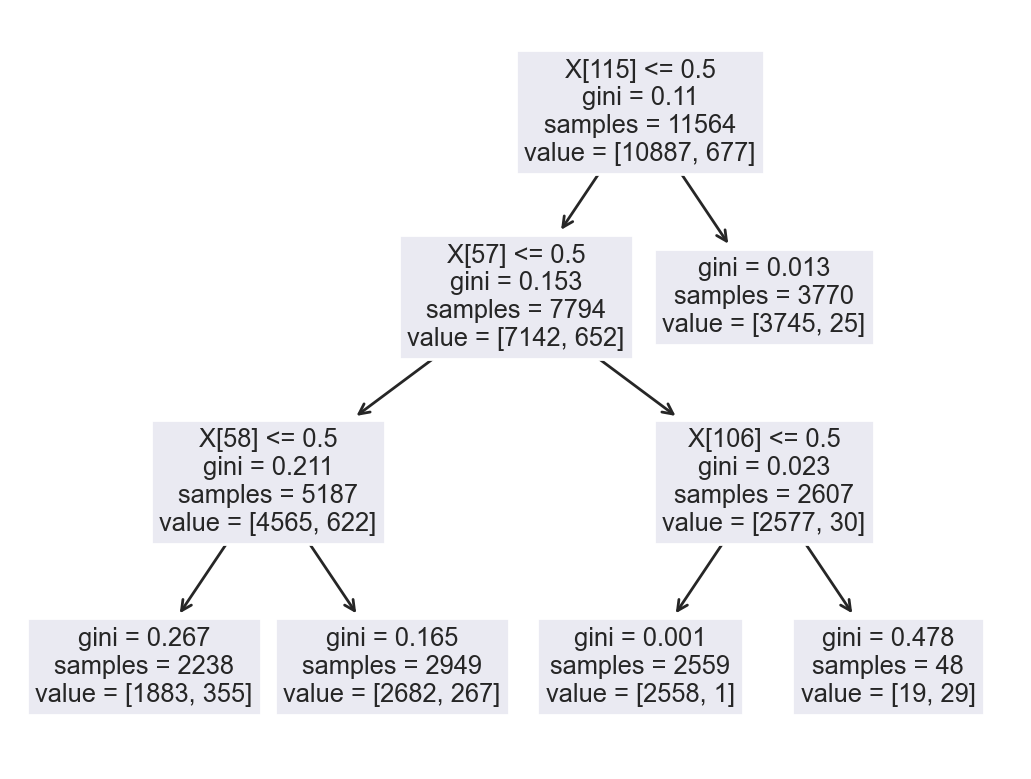

In [89]:
tree.plot_tree(clf)
plt.show()

In [90]:
y_predict = clf.predict(X_test)

# Compare actual and predicted 
actual_vs_predict = pd.DataFrame({'Actual' : y_test,
                                  'Prediction' : y_predict})
actual_vs_predict.sample(5)
print(actual_vs_predict['Actual'].sum(), actual_vs_predict['Prediction'].sum())

246 13


In [91]:
# Evaluate model
print('Classification metrics: \n', classification_report(y_test, y_predict))

Classification metrics: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      3609
           1       0.46      0.02      0.05       246

    accuracy                           0.94      3855
   macro avg       0.70      0.51      0.51      3855
weighted avg       0.91      0.94      0.91      3855



In [92]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[3602,    7],
       [ 240,    6]], dtype=int64)

### Create ConfusionMatrixDisplay
<p>With the fitted model, we compute the predictions of the model on the test dataset. These predictions are used to compute the confustion matrix which is plotted with the ConfusionMatrixDisplay</p>

https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#sphx-glr-auto-examples-miscellaneous-plot-display-object-visualization-py

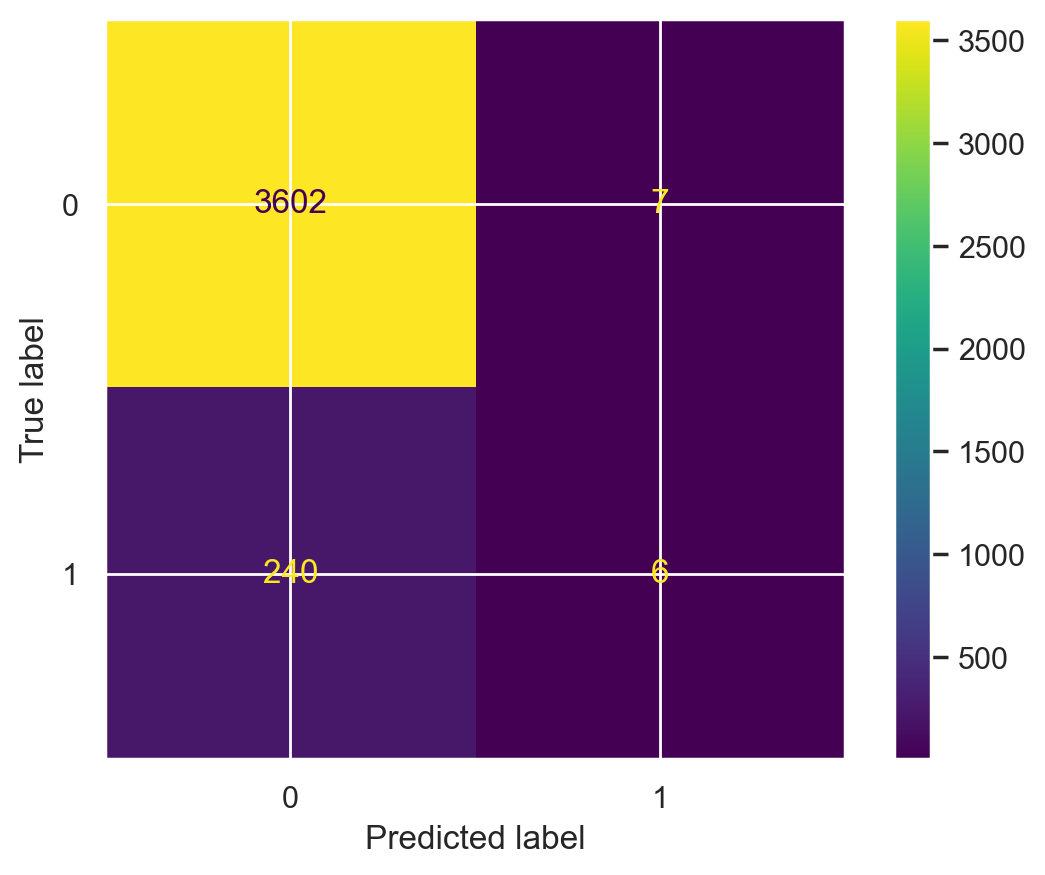

In [93]:
cm_display = ConfusionMatrixDisplay(cm).plot()

### Create RocCurveDisplay
<p>The roc curve requires either the probabilities or the non-thresholded decision values from the estimator. 
Since the logistic regression provides a decision function, we will use it to plot the roc curve: </p>

https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#sphx-glr-auto-examples-miscellaneous-plot-display-object-visualization-py

In [94]:
#X, y = fetch_openml(data_id=1464, return_X_y=True, parser="pandas")
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

clf2 = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
clf2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=0))])

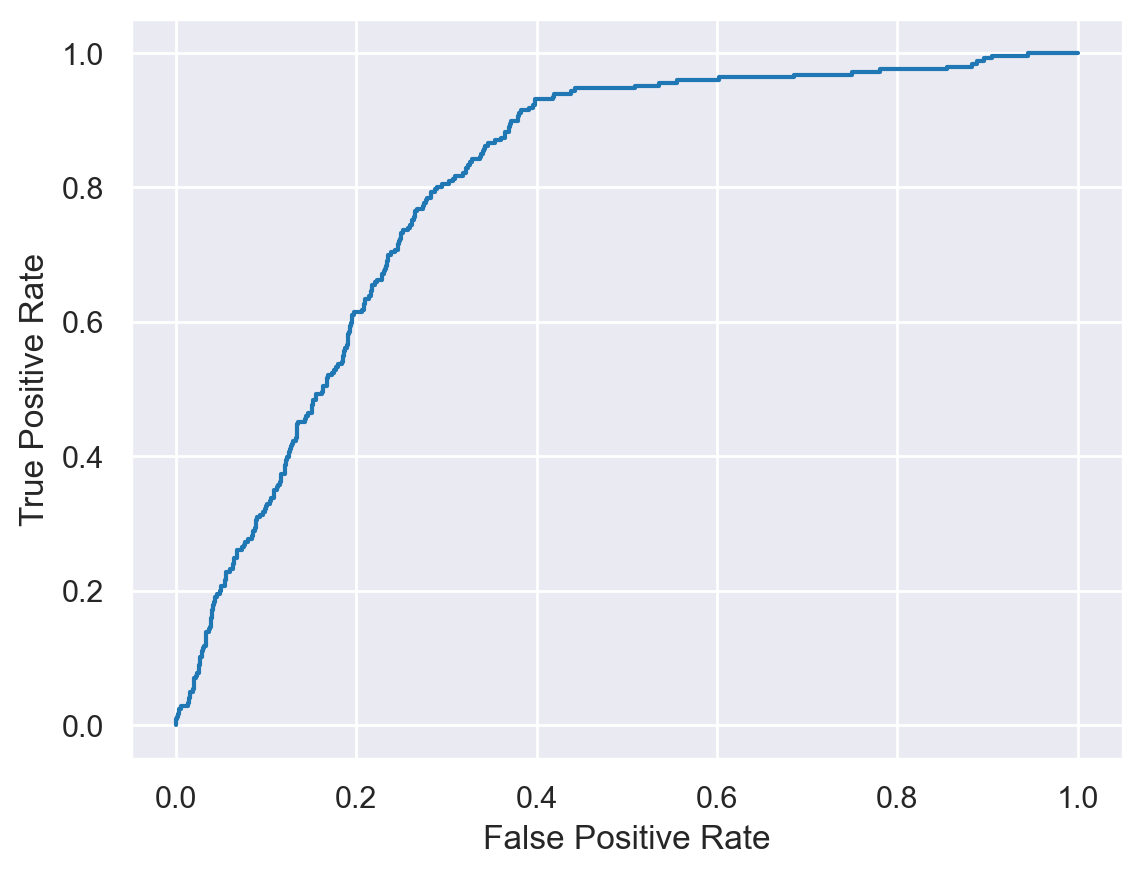

In [95]:
# from sklearn.metrics import RocCurveDisplay, roc_curve

y_score = clf2.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

### Create PrecisionRecallDisplay
<p>Similarly, the precision recall curve can be plotted using y_score from the prevision sections.</p>

https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#sphx-glr-auto-examples-miscellaneous-plot-display-object-visualization-py

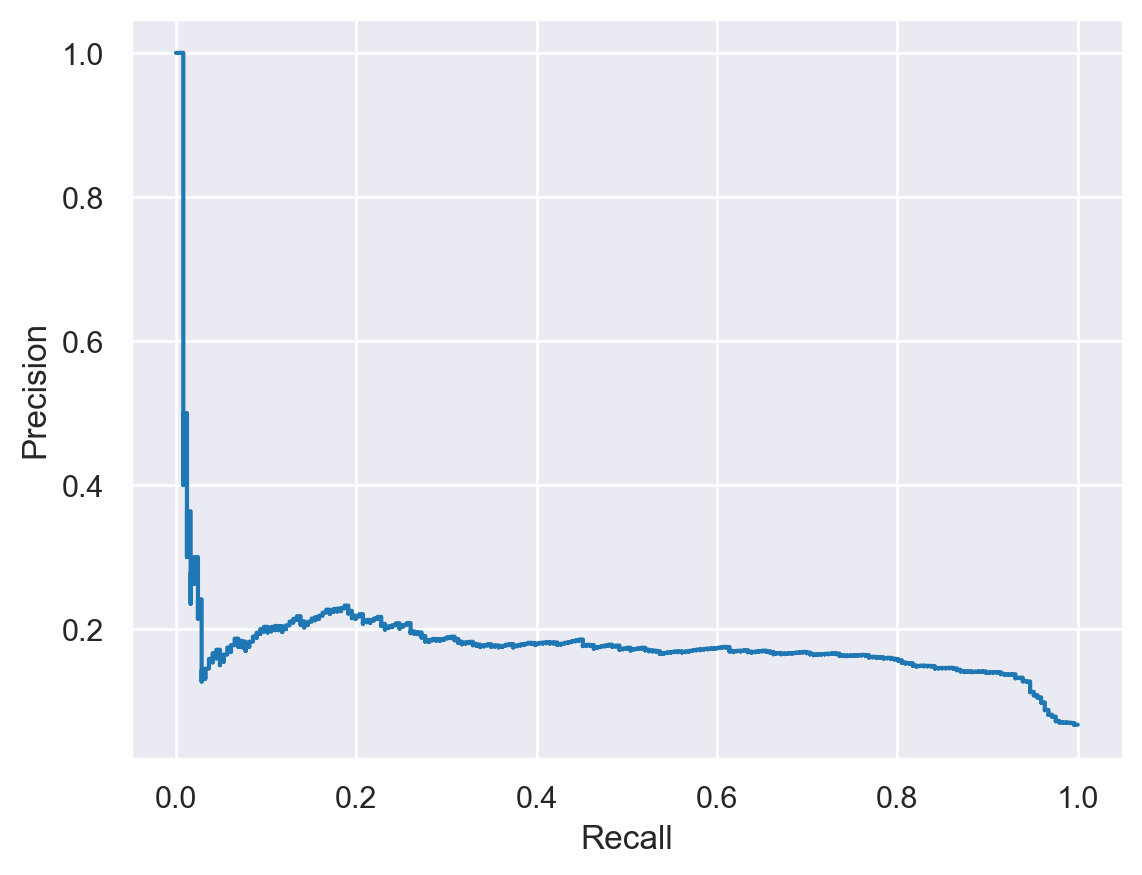

In [96]:
# from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=clf2.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

### Combining the display objects into a single plot
<p>The display objects store the computed values that were passed as arguments. This allows for the visualizations to be easliy combined using matplotlib’s API. In the following example, we place the displays next to each other in a row.</p>

https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#sphx-glr-auto-examples-miscellaneous-plot-display-object-visualization-py

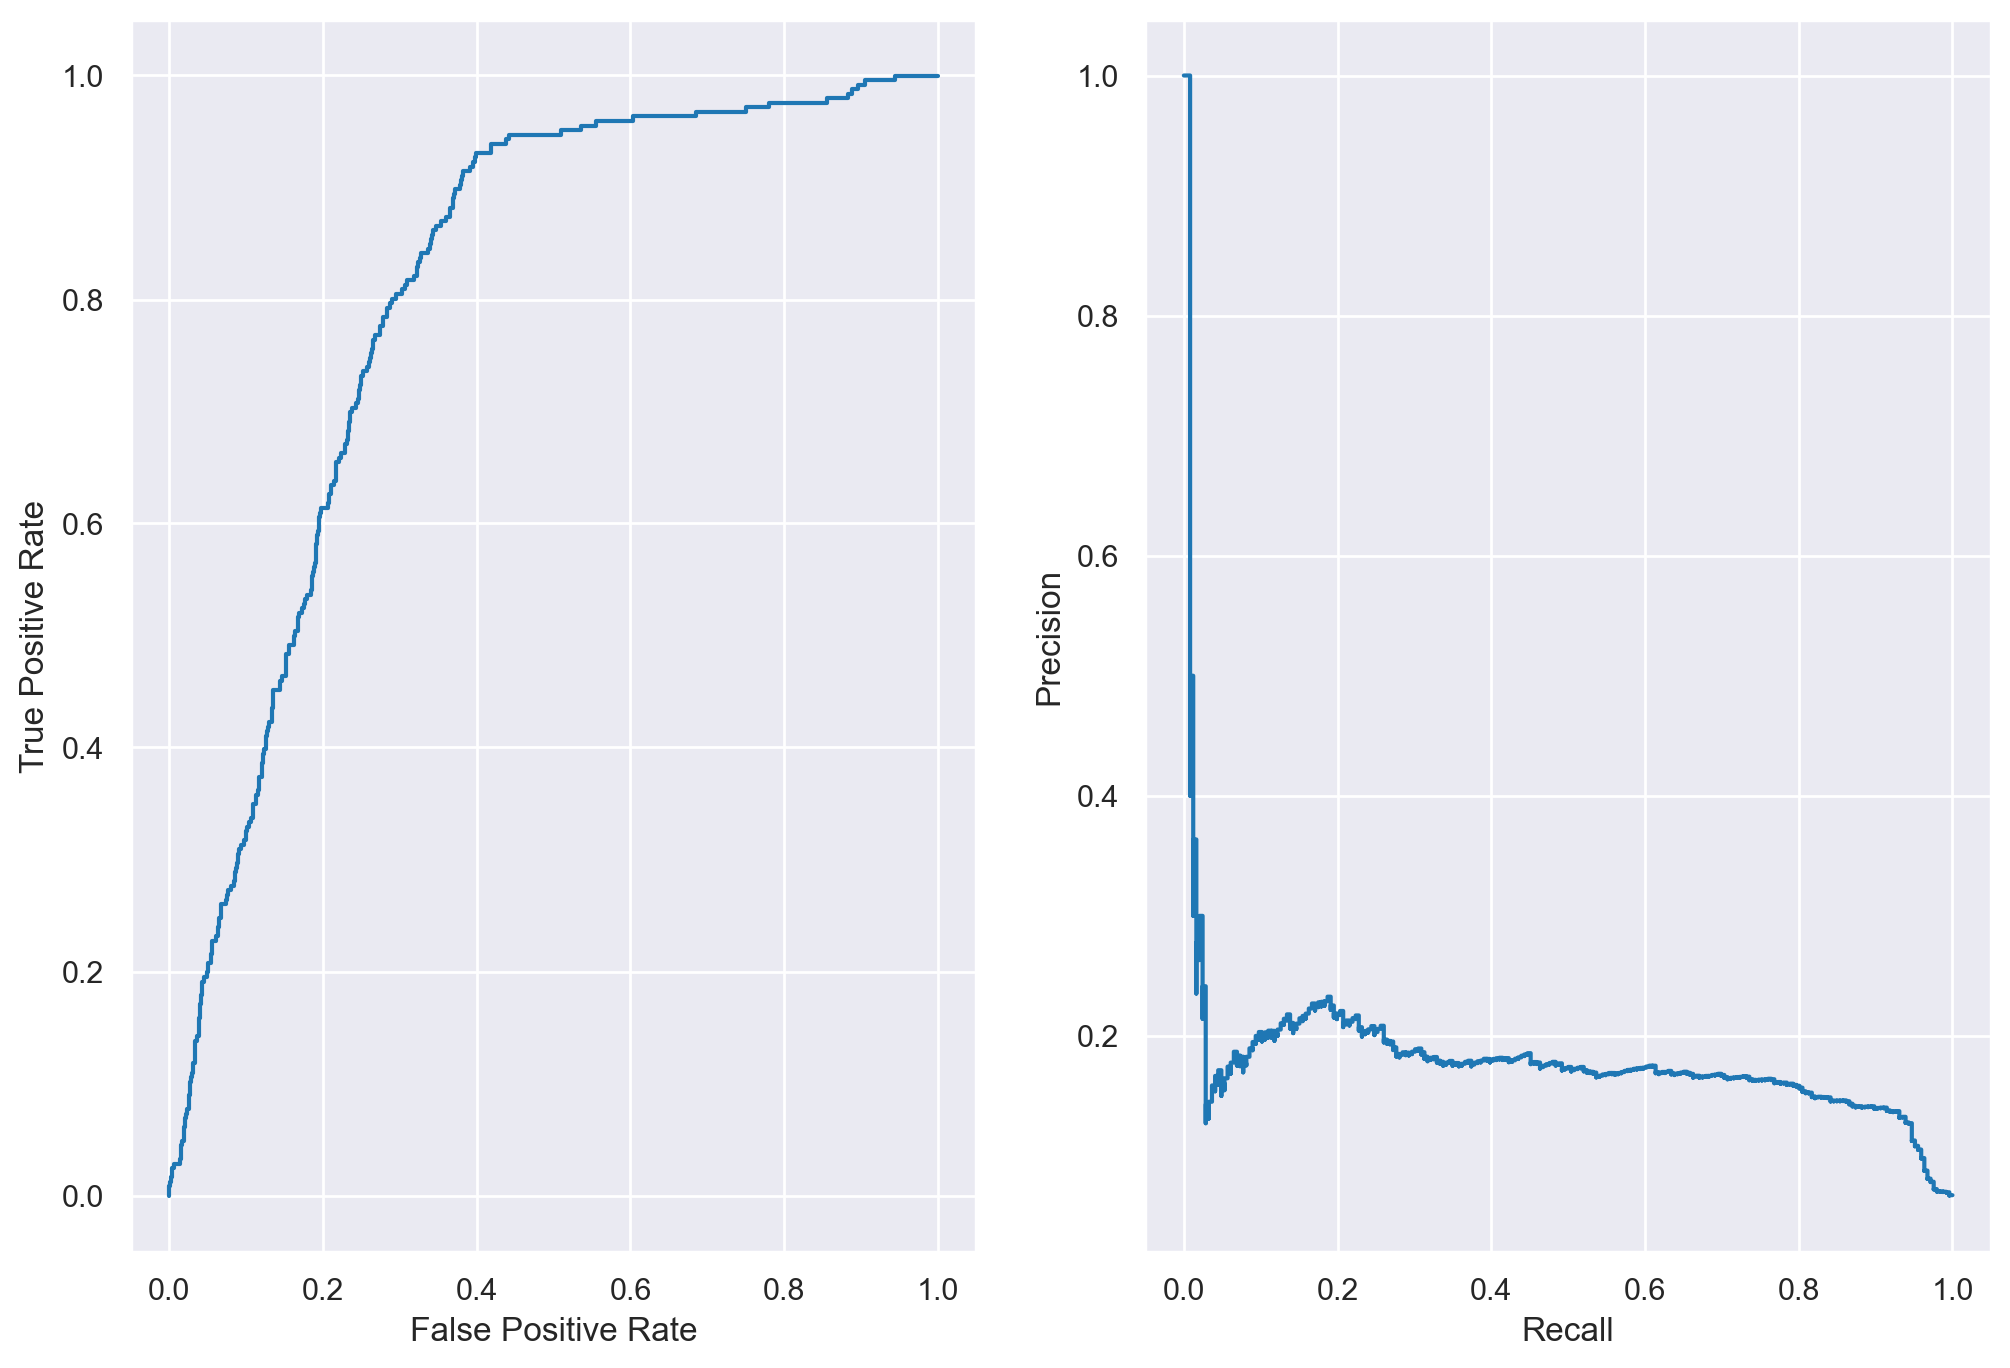

In [97]:
# import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
plt.show()